In [2]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import pickle

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import glob
import sys
import configparser
import string

# from post_treat_fcts import compute_phi, compute_E

listAlphabet = list(string.ascii_lowercase)



# plt.style.use('/home/petronio/Documents/varie/style_fp.mplstyle')
# plt.style.use('/home/petronio/Documents/varie/style_fp_pgf.mplstyle')


plt.rcParams['axes.grid'] = True
plt.rcParams.update({'ytick.right': True, 'ytick.right': True})
plt.rcParams["font.family"] = "serif"

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self._original_stdout

mcolors_list = list(mcolors.TABLEAU_COLORS.keys())

print(mcolors_list)

['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


## Functions

In [3]:
def max_distrib(temperature, energies):
    f_d = 2 * (energies/np.pi/temperature)**(.5)/temperature * np.exp(-energies/temperature)
    return f_d
def integrate_fct(E_vec, sigma_iz, f_distrib):
    f_distrib = f_distrib / phy_const.elementary_charge
    E_vec = E_vec * phy_const.elementary_charge
    integrando = f_distrib
    integral = sc.integrate.simps(integrando, E_vec)
    if integral - 1. > 1e-10:
        print("Warning: f(E) is not normalized")
        return 0

    integrando = sigma_iz * E_vec**.5 * f_distrib
    Kz = (2 / phy_const.electron_mass)**.5 * sc.integrate.simps(integrando, E_vec)
    return Kz

## Xenon

In [4]:
import scipy as sc

xarray = np.logspace(-4, 3, 1000)

# cross_sec = np.loadtxt('elastic.txt')
coll1 = """  0.000000e+0	1.220000e-18
 1.000000e-4	1.220000e-18
 1.000000e-3	1.150000e-18
 5.000000e-3	9.700000e-19
 7.000000e-3	9.110000e-19
 1.000000e-2	8.390000e-19
 2.000000e-2	6.730000e-19
 3.000000e-2	5.610000e-19
 3.514000e-2	5.143070e-19
 7.152000e-2	3.119150e-19
 1.091700e-1	2.026200e-19
 1.481500e-1	1.360930e-19
 1.885000e-1	9.269560e-20
 2.302700e-1	6.291420e-20
 2.735000e-1	4.327490e-20
 3.182600e-1	2.922920e-20
 3.645800e-1	1.949420e-20
 4.125400e-1	1.279860e-20
 4.621800e-1	8.277060e-21
 5.135600e-1	5.318070e-21
 5.667500e-1	3.555770e-21
 6.218100e-1	2.748970e-21
 7.378000e-1	3.959240e-21
 7.988700e-1	5.586910e-21
 8.620900e-1	7.517850e-21
 9.275200e-1	9.751120e-21
 9.952600e-1	1.239780e-20
 1.065380e+0	1.549480e-20
 1.137960e+0	1.909240e-20
 1.213090e+0	2.323290e-20
 1.290870e+0	2.791280e-20
 1.371370e+0	3.311990e-20
 1.454710e+0	3.888300e-20
 1.540970e+0	4.507280e-20
 1.630270e+0	5.172510e-20
 1.722700e+0	5.886420e-20
 1.818380e+0	6.569230e-20
 1.917430e+0	7.316110e-20
 2.019950e+0	8.110350e-20
 2.126080e+0	8.874580e-20
 2.235940e+0	9.696730e-20
 2.349650e+0	1.058070e-19
 2.467370e+0	1.153050e-19
 2.589220e+0	1.248140e-19
 2.715350e+0	1.346910e-19
 2.845920e+0	1.452090e-19
 2.981070e+0	1.564070e-19
 3.120980e+0	1.687010e-19
 3.265800e+0	1.818740e-19
 3.415700e+0	1.959200e-19
 3.570880e+0	2.095590e-19
 3.731510e+0	2.222950e-19
 3.897790e+0	2.356760e-19
 4.069910e+0	2.489900e-19
 4.248070e+0	2.617720e-19
 4.432500e+0	2.750990e-19
 4.623410e+0	2.866980e-19
 4.821030e+0	2.973770e-19
 5.025600e+0	3.074230e-19
 5.237350e+0	3.108670e-19
 5.456540e+0	3.143260e-19
 5.683440e+0	3.179930e-19
 5.918310e+0	3.217260e-19
 6.413100e+0	3.171660e-19
 6.673610e+0	3.138530e-19
 6.943280e+0	3.106530e-19
 7.222430e+0	3.014210e-19
 7.511380e+0	2.909970e-19
 7.810490e+0	2.809790e-19
 8.120110e+0	2.685560e-19
 8.440610e+0	2.525120e-19
 8.772370e+0	2.374860e-19
 9.115790e+0	2.222910e-19
 9.471290e+0	2.060470e-19
 9.839270e+0	1.910430e-19
 1.022018e+1	1.789420e-19
 1.061449e+1	1.688810e-19
 1.102264e+1	1.594150e-19
 1.144515e+1	1.505070e-19
 1.188250e+1	1.421220e-19
 1.233521e+1	1.338160e-19
 1.280384e+1	1.258790e-19
 1.328894e+1	1.184330e-19
 1.379108e+1	1.114440e-19
 1.431087e+1	1.048850e-19
 1.484893e+1	9.872510e-20
 1.540590e+1	9.391070e-20
 1.598244e+1	8.969280e-20
 1.657924e+1	8.567280e-20
 1.719701e+1	8.184080e-20
 1.783649e+1	7.818740e-20
 1.849845e+1	7.454430e-20
 1.918366e+1	7.102670e-20
 1.989296e+1	6.768100e-20
 2.062719e+1	6.511300e-20
 2.138721e+1	6.274980e-20
 2.217395e+1	6.047590e-20
 2.298833e+1	5.828780e-20
 2.383133e+1	5.618200e-20
 2.470396e+1	5.415510e-20
 2.560725e+1	5.218750e-20
 2.654229e+1	5.028590e-20
 2.751018e+1	4.845600e-20
 2.851209e+1	4.669480e-20
 2.954921e+1	4.499960e-20
 3.062278e+1	4.348880e-20
 3.173407e+1	4.211650e-20
 3.288442e+1	4.078900e-20
 3.407519e+1	3.950460e-20
 3.530781e+1	3.826200e-20
 3.658374e+1	3.705950e-20
 3.790451e+1	3.589600e-20
 3.927170e+1	3.476990e-20
 4.068694e+1	3.369110e-20
 4.215191e+1	3.265810e-20
 4.366836e+1	3.165750e-20
 4.523810e+1	3.068840e-20
 4.686301e+1	2.974960e-20
 4.854502e+1	2.884020e-20
 5.028614e+1	2.796890e-20
 5.208844e+1	2.717330e-20
 5.395409e+1	2.640080e-20
 5.588529e+1	2.565080e-20
 5.788437e+1	2.492250e-20
 5.995369e+1	2.421530e-20
 6.209573e+1	2.361940e-20
 6.431306e+1	2.304040e-20
 6.660830e+1	2.247590e-20
 6.898420e+1	2.192550e-20
 7.144360e+1	2.143110e-20
 7.398942e+1	2.097750e-20
 7.662471e+1	2.053370e-20
 7.935261e+1	2.009950e-20
 8.217638e+1	1.974380e-20
 8.509938e+1	1.941510e-20
 8.812509e+1	1.909210e-20
 9.125714e+1	1.877900e-20
 9.449926e+1	1.847780e-20
 9.785531e+1	1.818160e-20
 1.013293e+2	1.795780e-20
 1.086478e+2	1.773660e-20
 1.164898e+2	1.751820e-20
 1.248925e+2	1.730260e-20
 1.338963e+2	1.699390e-20
 1.435440e+2	1.668960e-20
 1.538817e+2	1.619790e-20
 1.593245e+2	1.579560e-20
 1.649587e+2	1.540350e-20
 1.707908e+2	1.502120e-20
 1.768279e+2	1.464840e-20
 1.830772e+2	1.428500e-20
 1.895461e+2	1.393060e-20
 1.962423e+2	1.358510e-20
 2.031738e+2	1.325620e-20
 2.103489e+2	1.294470e-20
 2.177762e+2	1.264050e-20
 2.254644e+2	1.234350e-20
 2.334229e+2	1.205360e-20
 2.416610e+2	1.177050e-20
 2.501886e+2	1.149570e-20
 2.590160e+2	1.129850e-20
 2.681535e+2	1.110470e-20
 2.776121e+2	1.091430e-20
 2.874031e+2	1.072720e-20
 2.975383e+2	1.054330e-20
 3.080295e+2	1.040400e-20
 3.188895e+2	1.027930e-20
 3.301311e+2	1.015610e-20
 3.417678e+2	1.003450e-20
 3.538134e+2	9.914290e-21
 3.662823e+2	9.795540e-21
 3.791894e+2	9.678230e-21
 3.925501e+2	9.562340e-21
 4.063803e+2	9.433180e-21
 4.206965e+2	9.288630e-21
 4.355158e+2	9.146300e-21
 4.508559e+2	9.006160e-21
 4.667351e+2	8.868180e-21
 4.831724e+2	8.732330e-21
 5.001872e+2	8.597580e-21
 5.178000e+2	8.377120e-21
 5.360318e+2	8.162320e-21
 5.549043e+2	7.953040e-21
 5.744399e+2	7.749140e-21
 5.946621e+2	7.550480e-21
 6.155950e+2	7.396620e-21
 6.372635e+2	7.259500e-21
 6.596934e+2	7.124930e-21
 6.829117e+2	6.992860e-21
 7.069458e+2	6.853740e-21
 7.318245e+2	6.694130e-21
 7.575776e+2	6.538250e-21
 7.842356e+2	6.386000e-21
 8.118305e+2	6.251370e-21
 8.403951e+2	6.138300e-21
 8.699636e+2	6.027280e-21
 9.005711e+2	5.918270e-21
 9.322543e+2	5.811240e-21
 9.650509e+2	5.706150e-21"""

coll2 = """ 8.315000e+0	0.000000e+0
 8.315100e+0	3.314210e-25
 8.350140e+0	1.163510e-22
 8.386520e+0	2.065670e-22
 8.424170e+0	2.545050e-22
 8.463150e+0	2.673690e-22
 8.503500e+0	2.621010e-22
 8.545270e+0	2.871610e-22
 8.588500e+0	3.331230e-22
 8.633260e+0	3.819170e-22
 8.679580e+0	4.343160e-22
 8.727540e+0	4.899430e-22
 8.777180e+0	5.529600e-22
 8.828560e+0	6.331240e-22
 8.881750e+0	7.462020e-22
 8.936810e+0	8.930680e-22
 8.993800e+0	1.043890e-21
 9.052800e+0	1.150560e-21
 9.113870e+0	1.148900e-21
 9.177090e+0	1.098330e-21
 9.242520e+0	1.062990e-21
 9.310260e+0	1.086420e-21
 9.380380e+0	1.210760e-21
 9.452960e+0	1.476730e-21
 9.528090e+0	2.251040e-21
 9.605870e+0	2.086020e-21
 9.686370e+0	1.519960e-21
 9.769710e+0	1.451820e-21
 9.855970e+0	1.520380e-21
 9.945270e+0	1.596210e-21
 1.003770e+1	1.666390e-21
 1.013338e+1	1.733370e-21
 1.023243e+1	1.802700e-21
 1.033495e+1	1.874470e-21
 1.044108e+1	1.948760e-21
 1.055094e+1	2.025660e-21
 1.066465e+1	2.102020e-21
 1.078237e+1	2.178540e-21
 1.090422e+1	2.257740e-21
 1.103035e+1	2.337000e-21
 1.116092e+1	2.410110e-21
 1.129607e+1	2.485800e-21
 1.143597e+1	2.564150e-21
 1.158079e+1	2.645240e-21
 1.173070e+1	2.729190e-21
 1.188588e+1	2.816090e-21
 1.204651e+1	2.902330e-21
 1.221279e+1	2.982140e-21
 1.238491e+1	3.064760e-21
 1.256307e+1	3.150280e-21
 1.274750e+1	3.238800e-21
 1.293841e+1	3.330440e-21
 1.313603e+1	3.429380e-21
 1.334060e+1	3.533700e-21
 1.355235e+1	3.641700e-21
 1.377154e+1	3.753490e-21
 1.399844e+1	3.869200e-21
 1.423331e+1	3.958660e-21
 1.447643e+1	4.051040e-21
 1.472810e+1	4.146680e-21
 1.498861e+1	4.245670e-21
 1.525828e+1	4.337820e-21
 1.553743e+1	4.432720e-21
 1.582638e+1	4.530970e-21
 1.612549e+1	4.623250e-21
 1.643511e+1	4.705300e-21
 1.675561e+1	4.790240e-21
 1.708737e+1	4.878150e-21
 1.743079e+1	4.969160e-21
 1.778629e+1	5.063370e-21
 1.815427e+1	5.150850e-21
 1.853518e+1	5.227040e-21
 1.892949e+1	5.305900e-21
 1.933764e+1	5.387530e-21
 1.976015e+1	5.472030e-21
 2.019750e+1	5.548640e-21
 2.065021e+1	5.614280e-21
 2.111884e+1	5.682230e-21
 2.160394e+1	5.752570e-21
 2.210608e+1	5.821140e-21
 2.262587e+1	5.875720e-21
 2.316393e+1	5.932210e-21
 2.372090e+1	5.990690e-21
 2.429744e+1	6.040820e-21
 2.489424e+1	6.082600e-21
 2.551201e+1	6.125840e-21
 2.615149e+1	6.166060e-21
 2.681345e+1	6.192540e-21
 2.749866e+1	6.219950e-21
 2.820796e+1	6.245200e-21
 2.894218e+1	6.263550e-21
 2.970221e+1	6.282560e-21
 3.048895e+1	6.294890e-21
 3.130333e+1	6.303030e-21
 3.214633e+1	6.311460e-21
 3.301896e+1	6.320190e-21
 3.392225e+1	6.329220e-21
 3.485729e+1	6.338570e-21
 3.582518e+1	6.331750e-21
 3.682709e+1	6.321730e-21
 3.786421e+1	6.311360e-21
 3.893778e+1	6.300620e-21
 4.004907e+1	6.288090e-21
 4.119942e+1	6.243220e-21
 4.239019e+1	6.196780e-21
 4.362281e+1	6.148710e-21
 4.489874e+1	6.098950e-21
 4.621951e+1	6.047440e-21
 4.758670e+1	5.994120e-21
 4.900194e+1	5.938920e-21
 5.046691e+1	5.891130e-21
 5.198336e+1	5.862320e-21
 5.355310e+1	5.832490e-21
 5.517801e+1	5.801620e-21
 5.686002e+1	5.769660e-21
 5.860114e+1	5.736580e-21
 6.040344e+1	5.696690e-21
 6.226909e+1	5.635120e-21
 6.420029e+1	5.571390e-21
 6.619937e+1	5.505420e-21
 6.826869e+1	5.437130e-21
 7.041073e+1	5.368090e-21
 7.262805e+1	5.303790e-21
 7.492330e+1	5.237220e-21
 7.729920e+1	5.168320e-21
 7.975860e+1	5.097000e-21
 8.230442e+1	5.023170e-21
 8.493971e+1	4.946750e-21
 8.766761e+1	4.867640e-21
 9.049138e+1	4.788210e-21
 9.341437e+1	4.718050e-21
 9.644009e+1	4.645440e-21
 9.957214e+1	4.570270e-21
 1.028143e+2	4.499490e-21
 1.061703e+2	4.427340e-21
 1.096443e+2	4.352650e-21
 1.132404e+2	4.275330e-21
 1.169628e+2	4.195300e-21
 1.208161e+2	4.114090e-21
 1.248048e+2	4.036310e-21
 1.289336e+2	3.955790e-21
 1.332075e+2	3.872450e-21
 1.376317e+2	3.786180e-21
 1.422113e+2	3.713460e-21
 1.469518e+2	3.656580e-21
 1.518590e+2	3.597690e-21
 1.569386e+2	3.536740e-21
 1.621967e+2	3.473640e-21
 1.676395e+2	3.408330e-21
 1.732737e+2	3.340720e-21
 1.791058e+2	3.270730e-21
 1.851429e+2	3.211140e-21
 1.913922e+2	3.151770e-21
 1.978611e+2	3.090320e-21
 2.045573e+2	3.026710e-21
 2.114888e+2	2.960860e-21
 2.186639e+2	2.892690e-21
 2.260912e+2	2.822130e-21
 2.337794e+2	2.749100e-21
 2.417379e+2	2.679570e-21
 2.499760e+2	2.630140e-21
 2.585036e+2	2.578980e-21
 2.673310e+2	2.526010e-21
 2.764685e+2	2.471190e-21
 2.859271e+2	2.414440e-21
 2.957181e+2	2.355690e-21
 3.058533e+2	2.294880e-21
 3.163445e+2	2.231930e-21
 3.272045e+2	2.182980e-21
 3.384461e+2	2.140830e-21
 3.500828e+2	2.097190e-21
 3.621284e+2	2.052550e-21
 3.745973e+2	2.008910e-21
 3.875044e+2	1.963730e-21
 4.008651e+2	1.916710e-21
 4.146953e+2	1.864160e-21
 4.290115e+2	1.809760e-21
 4.438308e+2	1.753440e-21
 4.591709e+2	1.702490e-21
 4.750501e+2	1.654850e-21
 4.914874e+2	1.605540e-21
 5.085022e+2	1.563850e-21
 5.261150e+2	1.530380e-21
 5.443468e+2	1.495740e-21
 5.632193e+2	1.459880e-21
 5.827549e+2	1.422770e-21
 6.029771e+2	1.385830e-21
 6.239100e+2	1.356530e-21
 6.455785e+2	1.326190e-21
 6.680085e+2	1.294790e-21
 6.912266e+2	1.262280e-21
 7.152608e+2	1.227110e-21
 7.401395e+2	1.189790e-21
 7.658926e+2	1.151160e-21
 7.925506e+2	1.111170e-21
 8.201455e+2	1.081870e-21
 8.487101e+2	1.056160e-21
 8.782786e+2	1.029550e-21"""

coll3 = """  9.447000e+0	0.000000e+0
 9.447100e+0	1.166570e-24
 9.482140e+0	8.192700e-23
 9.518520e+0	1.265190e-22
 9.556170e+0	1.578770e-22
 9.595150e+0	1.570970e-22
 9.635500e+0	1.520300e-22
 9.677270e+0	1.641800e-22
 9.720500e+0	2.145450e-22
 9.765260e+0	3.005120e-22
 9.811580e+0	4.001150e-22
 9.859540e+0	5.247970e-22
 9.909180e+0	6.533100e-22
 9.960560e+0	7.838250e-22
 1.001375e+1	9.153510e-22
 1.006881e+1	1.040890e-21
 1.012580e+1	1.170830e-21
 1.018480e+1	1.305350e-21
 1.024587e+1	1.438620e-21
 1.030909e+1	1.574540e-21
 1.037452e+1	1.715230e-21
 1.044226e+1	1.848180e-21
 1.051238e+1	1.977900e-21
 1.058496e+1	2.112180e-21
 1.066009e+1	2.234650e-21
 1.073787e+1	2.357140e-21
 1.081837e+1	2.483940e-21
 1.090171e+1	2.615190e-21
 1.098797e+1	2.751060e-21
 1.107727e+1	2.858860e-21
 1.116970e+1	2.965160e-21
 1.126538e+1	3.075190e-21
 1.136443e+1	3.189090e-21
 1.146695e+1	3.306990e-21
 1.157308e+1	3.429040e-21
 1.168294e+1	3.555380e-21
 1.179665e+1	3.686150e-21
 1.191437e+1	3.821520e-21
 1.203622e+1	3.944990e-21
 1.216235e+1	4.032020e-21
 1.229292e+1	4.122110e-21
 1.242807e+1	4.215370e-21
 1.256797e+1	4.311900e-21
 1.271279e+1	4.411830e-21
 1.286270e+1	4.515270e-21
 1.301788e+1	4.617690e-21
 1.317851e+1	4.686760e-21
 1.334479e+1	4.758260e-21
 1.351691e+1	4.832270e-21
 1.369507e+1	4.908880e-21
 1.387950e+1	4.988190e-21
 1.407041e+1	5.058310e-21
 1.426803e+1	5.109690e-21
 1.447260e+1	5.162870e-21
 1.468435e+1	5.217930e-21
 1.490354e+1	5.274920e-21
 1.513044e+1	5.318260e-21
 1.536531e+1	5.351140e-21
 1.560843e+1	5.385180e-21
 1.586010e+1	5.420410e-21
 1.612061e+1	5.447840e-21
 1.639028e+1	5.465370e-21
 1.666943e+1	5.483510e-21
 1.695838e+1	5.502290e-21
 1.725749e+1	5.521740e-21
 1.756711e+1	5.541860e-21
 1.788761e+1	5.562690e-21
 1.821937e+1	5.567810e-21
 1.856279e+1	5.564370e-21
 1.891829e+1	5.560820e-21
 1.928627e+1	5.557140e-21
 1.966718e+1	5.553330e-21
 2.006149e+1	5.547540e-21
 2.046964e+1	5.531210e-21
 2.089215e+1	5.514310e-21
 2.132950e+1	5.496820e-21
 2.178221e+1	5.478710e-21
 2.225084e+1	5.458710e-21
 2.273594e+1	5.436880e-21
 2.323808e+1	5.414290e-21
 2.375787e+1	5.390900e-21
 2.429593e+1	5.362240e-21
 2.485290e+1	5.328830e-21
 2.542944e+1	5.294230e-21
 2.602624e+1	5.258560e-21
 2.664401e+1	5.224580e-21
 2.728349e+1	5.189410e-21
 2.794545e+1	5.153000e-21
 2.863066e+1	5.112160e-21
 2.933996e+1	5.069600e-21
 3.007418e+1	5.025850e-21
 3.083421e+1	4.983280e-21
 3.162095e+1	4.939230e-21
 3.243533e+1	4.893620e-21
 3.327833e+1	4.846410e-21
 3.415096e+1	4.797550e-21
 3.505425e+1	4.747290e-21
 3.598929e+1	4.700540e-21
 3.695718e+1	4.652140e-21
 3.795909e+1	4.602050e-21
 3.899621e+1	4.550190e-21
 4.006978e+1	4.497070e-21
 4.118107e+1	4.450390e-21
 4.233142e+1	4.402080e-21
 4.352219e+1	4.352070e-21
 4.475481e+1	4.300300e-21
 4.603074e+1	4.246710e-21
 4.735151e+1	4.191240e-21
 4.871870e+1	4.133810e-21
 5.013394e+1	4.075450e-21
 5.159891e+1	4.025640e-21
 5.311536e+1	3.974080e-21
 5.468510e+1	3.920710e-21
 5.631001e+1	3.865460e-21
 5.799202e+1	3.808270e-21
 5.973314e+1	3.749070e-21
 6.153544e+1	3.697010e-21
 6.340109e+1	3.644770e-21
 6.533229e+1	3.590700e-21
 6.733137e+1	3.534720e-21
 6.940069e+1	3.476780e-21
 7.154273e+1	3.424520e-21
 7.376005e+1	3.373520e-21
 7.605530e+1	3.320730e-21
 7.843120e+1	3.266080e-21
 8.089060e+1	3.211300e-21
 8.343642e+1	3.157840e-21
 8.607171e+1	3.102490e-21
 8.879961e+1	3.045210e-21
 9.162338e+1	2.990780e-21
 9.454637e+1	2.938170e-21
 9.757209e+1	2.883700e-21
 1.007041e+2	2.829790e-21
 1.039463e+2	2.782780e-21
 1.073023e+2	2.734120e-21
 1.107763e+2	2.683740e-21
 1.143724e+2	2.631600e-21
 1.180948e+2	2.577630e-21
 1.219481e+2	2.527600e-21
 1.259368e+2	2.481730e-21
 1.300656e+2	2.434250e-21
 1.343395e+2	2.385100e-21
 1.387637e+2	2.334220e-21
 1.433433e+2	2.289910e-21
 1.480838e+2	2.247250e-21
 1.529910e+2	2.203080e-21
 1.580706e+2	2.157360e-21
 1.633287e+2	2.115040e-21
 1.687715e+2	2.074210e-21
 1.744057e+2	2.031960e-21
 1.802378e+2	1.988340e-21
 1.862749e+2	1.946080e-21
 1.925242e+2	1.902330e-21
 1.989931e+2	1.857050e-21
 2.056893e+2	1.820130e-21
 2.126208e+2	1.783740e-21
 2.197959e+2	1.746070e-21
 2.272232e+2	1.707080e-21
 2.349114e+2	1.666710e-21
 2.428699e+2	1.628520e-21
 2.511080e+2	1.595570e-21
 2.596356e+2	1.561460e-21
 2.684630e+2	1.526150e-21
 2.776005e+2	1.489600e-21
 2.870591e+2	1.455290e-21
 2.968501e+2	1.421020e-21
 3.069853e+2	1.385550e-21
 3.174765e+2	1.348830e-21
 3.283365e+2	1.319160e-21
 3.395781e+2	1.291050e-21
 3.512148e+2	1.261960e-21
 3.632604e+2	1.231850e-21
 3.757293e+2	1.200680e-21
 3.886364e+2	1.168410e-21
 4.019971e+2	1.136800e-21
 4.158273e+2	1.114680e-21
 4.301435e+2	1.091770e-21
 4.449628e+2	1.068060e-21
 4.603029e+2	1.041450e-21
 4.761821e+2	1.012870e-21
 4.926194e+2	9.832850e-22
 5.096342e+2	9.585350e-22
 5.272470e+2	9.375760e-22
 5.454788e+2	9.158800e-22
 5.643513e+2	8.934220e-22
 5.838869e+2	8.701750e-22
 6.041091e+2	8.470960e-22
 6.250420e+2	8.272100e-22
 6.467105e+2	8.066250e-22
 6.691404e+2	7.853170e-22
 6.923587e+2	7.632590e-22
 7.163928e+2	7.441970e-22
 7.412715e+2	7.262840e-22
 7.670246e+2	7.077420e-22
 7.936826e+2	6.885490e-22
 8.212775e+2	6.712330e-22
 8.498421e+2	6.540950e-22
 8.794106e+2	6.363540e-22
 9.100181e+2	6.190910e-22
 9.417013e+2	6.035660e-22
 9.744979e+2	5.874960e-22"""

coll4 = """  9.917000e+0	0.000000e+0
 9.917100e+0	6.024080e-29
 9.952140e+0	2.116990e-26
 9.988520e+0	4.308380e-26
 1.002617e+1	5.095320e-23
 1.006515e+1	1.267570e-22
 1.010550e+1	2.052250e-22
 1.014727e+1	2.864510e-22
 1.019050e+1	3.705310e-22
 1.023526e+1	5.284410e-22
 1.028158e+1	7.116620e-22
 1.032954e+1	9.013210e-22
 1.037918e+1	1.097650e-21
 1.043056e+1	1.290020e-21
 1.048375e+1	1.481500e-21
 1.053881e+1	1.679720e-21
 1.059580e+1	1.884890e-21
 1.065480e+1	2.071250e-21
 1.071587e+1	2.262100e-21
 1.077909e+1	2.459650e-21
 1.084452e+1	2.664140e-21
 1.091226e+1	2.875820e-21
 1.098238e+1	3.094940e-21
 1.105496e+1	3.314890e-21
 1.113009e+1	3.540280e-21
 1.120787e+1	3.773600e-21
 1.128837e+1	4.015120e-21
 1.137171e+1	4.265130e-21
 1.145797e+1	4.523920e-21
 1.154727e+1	4.791800e-21
 1.163970e+1	5.069100e-21
 1.173538e+1	5.356150e-21
 1.183443e+1	5.653280e-21
 1.193695e+1	5.960850e-21
 1.204308e+1	6.234000e-21
 1.215294e+1	6.448230e-21
 1.226665e+1	6.669980e-21
 1.238437e+1	6.899520e-21
 1.250622e+1	7.137130e-21
 1.263235e+1	7.383090e-21
 1.276292e+1	7.637690e-21
 1.289807e+1	7.901240e-21
 1.303798e+1	8.148990e-21
 1.318280e+1	8.335810e-21
 1.333270e+1	8.529190e-21
 1.348788e+1	8.729370e-21
 1.364851e+1	8.936580e-21
 1.381479e+1	9.151080e-21
 1.398691e+1	9.373110e-21
 1.416507e+1	9.540220e-21
 1.434950e+1	9.708050e-21
 1.454041e+1	9.881780e-21
 1.473803e+1	1.006160e-20
 1.494260e+1	1.024780e-20
 1.515435e+1	1.037720e-20
 1.537354e+1	1.048680e-20
 1.560044e+1	1.060020e-20
 1.583531e+1	1.071770e-20
 1.607843e+1	1.082350e-20
 1.633010e+1	1.089900e-20
 1.659061e+1	1.097720e-20
 1.686028e+1	1.105810e-20
 1.713943e+1	1.114180e-20
 1.742838e+1	1.122850e-20
 1.772749e+1	1.131820e-20
 1.803711e+1	1.140560e-20
 1.835761e+1	1.145360e-20
 1.868937e+1	1.150340e-20
 1.903279e+1	1.155490e-20
 1.938829e+1	1.160820e-20
 1.975627e+1	1.166340e-20
 2.013718e+1	1.170000e-20
 2.053149e+1	1.170000e-20
 2.093964e+1	1.170000e-20
 2.136215e+1	1.170000e-20
 2.179950e+1	1.170000e-20
 2.225221e+1	1.168740e-20
 2.272084e+1	1.166400e-20
 2.320594e+1	1.163970e-20
 2.370808e+1	1.161460e-20
 2.422787e+1	1.158860e-20
 2.476593e+1	1.156170e-20
 2.532290e+1	1.153390e-20
 2.589944e+1	1.150500e-20
 2.649624e+1	1.145040e-20
 2.711401e+1	1.138860e-20
 2.775349e+1	1.132470e-20
 2.841545e+1	1.125850e-20
 2.910066e+1	1.118990e-20
 2.980996e+1	1.111900e-20
 3.054419e+1	1.105650e-20
 3.130421e+1	1.099570e-20
 3.209095e+1	1.093270e-20
 3.290533e+1	1.086760e-20
 3.374833e+1	1.080010e-20
 3.462096e+1	1.073030e-20
 3.552425e+1	1.064760e-20
 3.645929e+1	1.055410e-20
 3.742718e+1	1.045730e-20
 3.842909e+1	1.035710e-20
 3.946621e+1	1.025340e-20
 4.053978e+1	1.015140e-20
 4.165107e+1	1.005140e-20
 4.280142e+1	9.947870e-21
 4.399219e+1	9.840700e-21
 4.522481e+1	9.729770e-21
 4.650074e+1	9.614930e-21
 4.782151e+1	9.496060e-21
 4.918870e+1	9.373020e-21
 5.060394e+1	9.256520e-21
 5.206891e+1	9.151040e-21
 5.358536e+1	9.041850e-21
 5.515510e+1	8.928830e-21
 5.678001e+1	8.811840e-21
 5.846202e+1	8.690730e-21
 6.020314e+1	8.568220e-21
 6.200544e+1	8.463680e-21
 6.387109e+1	8.355480e-21
 6.580229e+1	8.243470e-21
 6.780137e+1	8.127520e-21
 6.987069e+1	8.007500e-21
 7.201273e+1	7.889300e-21
 7.423006e+1	7.767350e-21
 7.652530e+1	7.641110e-21
 7.890120e+1	7.510430e-21
 8.136060e+1	7.390130e-21
 8.390642e+1	7.278120e-21
 8.654171e+1	7.162160e-21
 8.926961e+1	7.042140e-21
 9.209338e+1	6.926260e-21
 9.501638e+1	6.809340e-21
 9.804209e+1	6.688320e-21
 1.011741e+2	6.571840e-21
 1.044163e+2	6.466470e-21
 1.077723e+2	6.357400e-21
 1.112463e+2	6.244500e-21
 1.148424e+2	6.127620e-21
 1.185648e+2	6.006640e-21
 1.224181e+2	5.897130e-21
 1.264068e+2	5.793420e-21
 1.305356e+2	5.686070e-21
 1.348095e+2	5.574950e-21
 1.392337e+2	5.459920e-21
 1.438133e+2	5.358010e-21
 1.485538e+2	5.256090e-21
 1.534610e+2	5.150590e-21
 1.585406e+2	5.041380e-21
 1.637987e+2	4.943520e-21
 1.692415e+2	4.848270e-21
 1.748757e+2	4.749680e-21
 1.807078e+2	4.649030e-21
 1.867449e+2	4.555450e-21
 1.929942e+2	4.458590e-21
 1.994631e+2	4.358320e-21
 2.061593e+2	4.274550e-21
 2.130908e+2	4.189640e-21
 2.202659e+2	4.101740e-21
 2.276932e+2	4.010760e-21
 2.353814e+2	3.916580e-21
 2.433399e+2	3.828270e-21
 2.515780e+2	3.750010e-21
 2.601056e+2	3.669000e-21
 2.689330e+2	3.585140e-21
 2.780705e+2	3.498330e-21
 2.875291e+2	3.423530e-21
 2.973202e+2	3.350100e-21
 3.074553e+2	3.274090e-21
 3.179465e+2	3.195400e-21
 3.288065e+2	3.122760e-21
 3.400481e+2	3.049690e-21
 3.516848e+2	2.974050e-21
 3.637304e+2	2.900420e-21
 3.761993e+2	2.834950e-21
 3.891064e+2	2.767190e-21
 4.024671e+2	2.699140e-21
 4.162973e+2	2.638290e-21
 4.306135e+2	2.575300e-21
 4.454328e+2	2.510100e-21
 4.607729e+2	2.449060e-21
 4.766521e+2	2.388720e-21
 4.930894e+2	2.326260e-21
 5.101042e+2	2.271710e-21
 5.277170e+2	2.222390e-21
 5.459488e+2	2.171340e-21
 5.648213e+2	2.118500e-21
 5.843569e+2	2.063800e-21
 6.045791e+2	2.009930e-21
 6.255120e+2	1.963870e-21
 6.471805e+2	1.916200e-21
 6.696105e+2	1.866860e-21
 6.928287e+2	1.815780e-21
 7.168628e+2	1.769650e-21
 7.417415e+2	1.724870e-21
 7.674946e+2	1.678510e-21
 7.941526e+2	1.630530e-21
 8.217475e+2	1.591730e-21
 8.503121e+2	1.554590e-21
 8.798806e+2	1.516160e-21
 9.104881e+2	1.477410e-21
 9.421713e+2	1.439390e-21
 9.749679e+2	1.400040e-21"""

coll5 = """   1.170000e+1	0.000000e+0
 1.170100e+1	6.466660e-27
 1.173514e+1	2.272530e-24
 1.177152e+1	4.624910e-24
 1.180917e+1	7.059970e-24
 1.184815e+1	9.580590e-24
 1.188850e+1	1.218980e-23
 1.193027e+1	1.489070e-23
 1.197350e+1	1.768650e-23
 1.201826e+1	2.450450e-23
 1.206458e+1	3.745740e-23
 1.211254e+1	5.086540e-23
 1.216218e+1	6.474470e-23
 1.221356e+1	7.911170e-23
 1.226675e+1	9.398350e-23
 1.232181e+1	1.093780e-22
 1.237880e+1	1.253140e-22
 1.243780e+1	1.418090e-22
 1.249887e+1	1.588840e-22
 1.256209e+1	1.765600e-22
 1.262752e+1	1.948560e-22
 1.269526e+1	2.137950e-22
 1.276538e+1	2.334000e-22
 1.283796e+1	2.536940e-22
 1.291309e+1	2.747010e-22
 1.299087e+1	2.964470e-22
 1.307137e+1	3.330450e-22
 1.315471e+1	3.727960e-22
 1.324097e+1	4.139440e-22
 1.333027e+1	4.565380e-22
 1.342270e+1	5.006280e-22
 1.351838e+1	5.462690e-22
 1.361743e+1	5.935130e-22
 1.371995e+1	6.424170e-22
 1.382608e+1	6.930400e-22
 1.393594e+1	7.454420e-22
 1.404965e+1	8.040050e-22
 1.416737e+1	8.703960e-22
 1.428922e+1	9.391200e-22
 1.441535e+1	1.010260e-21
 1.454592e+1	1.083900e-21
 1.468107e+1	1.160120e-21
 1.482098e+1	1.239030e-21
 1.496579e+1	1.320710e-21
 1.511570e+1	1.409420e-21
 1.527088e+1	1.502530e-21
 1.543151e+1	1.598910e-21
 1.559779e+1	1.698670e-21
 1.576991e+1	1.801940e-21
 1.594807e+1	1.908840e-21
 1.613250e+1	2.015530e-21
 1.632341e+1	2.124350e-21
 1.652103e+1	2.236990e-21
 1.672560e+1	2.353590e-21
 1.693735e+1	2.474290e-21
 1.715654e+1	2.599230e-21
 1.738344e+1	2.728560e-21
 1.761831e+1	2.862440e-21
 1.786143e+1	3.001020e-21
 1.811310e+1	3.137680e-21
 1.837361e+1	3.270540e-21
 1.864328e+1	3.408070e-21
 1.892243e+1	3.550440e-21
 1.921138e+1	3.697800e-21
 1.951049e+1	3.850350e-21
 1.982011e+1	4.008260e-21
 2.014061e+1	4.159060e-21
 2.047237e+1	4.298400e-21
 2.081579e+1	4.442630e-21
 2.117129e+1	4.591940e-21
 2.153927e+1	4.746490e-21
 2.192018e+1	4.906480e-21
 2.231449e+1	5.050070e-21
 2.272264e+1	5.192930e-21
 2.314515e+1	5.340800e-21
 2.358250e+1	5.493870e-21
 2.403521e+1	5.650210e-21
 2.450384e+1	5.786110e-21
 2.498894e+1	5.926790e-21
 2.549108e+1	6.072410e-21
 2.601087e+1	6.222500e-21
 2.654893e+1	6.346250e-21
 2.710590e+1	6.474360e-21
 2.768244e+1	6.606960e-21
 2.827924e+1	6.731660e-21
 2.889701e+1	6.845950e-21
 2.953649e+1	6.964250e-21
 3.019845e+1	7.074610e-21
 3.088366e+1	7.159570e-21
 3.159296e+1	7.247530e-21
 3.232719e+1	7.338570e-21
 3.308721e+1	7.432810e-21
 3.387395e+1	7.530370e-21
 3.468833e+1	7.631350e-21
 3.553133e+1	7.706130e-21
 3.640396e+1	7.765470e-21
 3.730725e+1	7.826890e-21
 3.824229e+1	7.890480e-21
 3.921018e+1	7.956290e-21
 4.021209e+1	8.014030e-21
 4.124921e+1	8.033730e-21
 4.232278e+1	8.054130e-21
 4.343407e+1	8.075250e-21
 4.458442e+1	8.097100e-21
 4.577519e+1	8.119730e-21
 4.700781e+1	8.143150e-21
 4.828374e+1	8.167390e-21
 4.960451e+1	8.192490e-21
 5.097170e+1	8.187370e-21
 5.238694e+1	8.168970e-21
 5.385191e+1	8.149920e-21
 5.536836e+1	8.130210e-21
 5.693810e+1	8.109800e-21
 5.856301e+1	8.088680e-21
 6.024502e+1	8.064360e-21
 6.198614e+1	8.024320e-21
 6.378844e+1	7.982870e-21
 6.565409e+1	7.939960e-21
 6.758529e+1	7.895540e-21
 6.958437e+1	7.849560e-21
 7.165369e+1	7.793700e-21
 7.379573e+1	7.733720e-21
 7.601306e+1	7.671630e-21
 7.830830e+1	7.607370e-21
 8.068420e+1	7.540160e-21
 8.314360e+1	7.468840e-21
 8.568942e+1	7.395010e-21
 8.832471e+1	7.318580e-21
 9.105261e+1	7.239470e-21
 9.387638e+1	7.157580e-21
 9.679938e+1	7.072820e-21
 9.982509e+1	6.985070e-21
 1.029571e+2	6.901640e-21
 1.061993e+2	6.815720e-21
 1.095553e+2	6.726780e-21
 1.130293e+2	6.634720e-21
 1.166254e+2	6.539430e-21
 1.203478e+2	6.441830e-21
 1.242011e+2	6.351270e-21
 1.281898e+2	6.257540e-21
 1.323186e+2	6.160510e-21
 1.365925e+2	6.060080e-21
 1.410167e+2	5.959670e-21
 1.455963e+2	5.868070e-21
 1.503368e+2	5.773260e-21
 1.552440e+2	5.675120e-21
 1.603236e+2	5.574340e-21
 1.655817e+2	5.482320e-21
 1.710245e+2	5.387070e-21
 1.766587e+2	5.288470e-21
 1.824908e+2	5.191390e-21
 1.885279e+2	5.097820e-21
 1.947772e+2	5.000950e-21
 2.012461e+2	4.904420e-21
 2.079423e+2	4.820720e-21
 2.148738e+2	4.734080e-21
 2.220489e+2	4.644390e-21
 2.294762e+2	4.551550e-21
 2.371644e+2	4.455440e-21
 2.451229e+2	4.366210e-21
 2.533610e+2	4.279710e-21
 2.618886e+2	4.190170e-21
 2.707160e+2	4.097480e-21
 2.798535e+2	4.001540e-21
 2.893121e+2	3.923180e-21
 2.991032e+2	3.842400e-21
 3.092383e+2	3.758780e-21
 3.197295e+2	3.672230e-21
 3.305895e+2	3.598520e-21
 3.418311e+2	3.522640e-21
 3.534678e+2	3.444090e-21
 3.655134e+2	3.366920e-21
 3.779823e+2	3.292110e-21
 3.908894e+2	3.214660e-21
 4.042501e+2	3.138750e-21
 4.180803e+2	3.069600e-21
 4.323965e+2	2.998020e-21
 4.472158e+2	2.923920e-21
 4.625559e+2	2.859780e-21
 4.784351e+2	2.796260e-21
 4.948724e+2	2.730510e-21
 5.118872e+2	2.669580e-21
 5.295000e+2	2.609700e-21
 5.477318e+2	2.547710e-21
 5.666043e+2	2.483550e-21
 5.861399e+2	2.417120e-21
 6.063621e+2	2.354090e-21
 6.272950e+2	2.301760e-21
 6.489635e+2	2.247590e-21
 6.713935e+2	2.191520e-21
 6.946117e+2	2.133470e-21
 7.186458e+2	2.082710e-21
 7.435245e+2	2.032950e-21
 7.692776e+2	1.981440e-21
 7.959356e+2	1.928130e-21
 8.235305e+2	1.882350e-21
 8.520951e+2	1.836650e-21
 8.816636e+2	1.789340e-21
 9.122711e+2	1.742820e-21
 9.439543e+2	1.698460e-21
 9.767509e+2	1.652550e-21"""

ioniz = """ 1.213000e+1	0.000000e+0
 1.213100e+1	2.432430e-25
 1.216514e+1	8.548100e-23
 1.220152e+1	1.739660e-22
 1.223917e+1	2.655600e-22
 1.227815e+1	3.603740e-22
 1.231850e+1	4.585190e-22
 1.236027e+1	5.601130e-22
 1.240350e+1	6.652780e-22
 1.244826e+1	7.741380e-22
 1.249458e+1	8.868240e-22
 1.254254e+1	1.024210e-21
 1.259218e+1	1.169160e-21
 1.264356e+1	1.319200e-21
 1.269675e+1	1.474510e-21
 1.275181e+1	1.635290e-21
 1.280880e+1	1.801710e-21
 1.286780e+1	1.973980e-21
 1.292887e+1	2.152300e-21
 1.299209e+1	2.336890e-21
 1.305753e+1	2.541780e-21
 1.312526e+1	2.755830e-21
 1.319538e+1	2.977400e-21
 1.326796e+1	3.206760e-21
 1.334309e+1	3.444180e-21
 1.342087e+1	3.689940e-21
 1.350137e+1	3.944530e-21
 1.358471e+1	4.219540e-21
 1.367097e+1	4.504210e-21
 1.376027e+1	4.798880e-21
 1.385270e+1	5.103910e-21
 1.394838e+1	5.419660e-21
 1.404743e+1	5.752200e-21
 1.414995e+1	6.102840e-21
 1.425608e+1	6.465790e-21
 1.436594e+1	6.841500e-21
 1.447965e+1	7.230420e-21
 1.459737e+1	7.642740e-21
 1.471922e+1	8.071650e-21
 1.484535e+1	8.515640e-21
 1.497592e+1	8.975230e-21
 1.511107e+1	9.468740e-21
 1.525098e+1	9.983590e-21
 1.539580e+1	1.051650e-20
 1.554570e+1	1.106450e-20
 1.570088e+1	1.162320e-20
 1.586151e+1	1.220140e-20
 1.602779e+1	1.278340e-20
 1.619991e+1	1.329970e-20
 1.637807e+1	1.383420e-20
 1.656250e+1	1.440000e-20
 1.675341e+1	1.501090e-20
 1.695103e+1	1.564330e-20
 1.715560e+1	1.622010e-20
 1.736735e+1	1.679180e-20
 1.758654e+1	1.738370e-20
 1.781344e+1	1.799630e-20
 1.804831e+1	1.862560e-20
 1.829143e+1	1.925770e-20
 1.854310e+1	1.991210e-20
 1.880362e+1	2.058940e-20
 1.907328e+1	2.127590e-20
 1.935243e+1	2.194580e-20
 1.964138e+1	2.263930e-20
 1.994049e+1	2.335720e-20
 2.025011e+1	2.402520e-20
 2.057061e+1	2.469830e-20
 2.090237e+1	2.539500e-20
 2.124579e+1	2.623910e-20
 2.160129e+1	2.716330e-20
 2.196927e+1	2.812010e-20
 2.235018e+1	2.890040e-20
 2.274449e+1	2.968900e-20
 2.315264e+1	3.049000e-20
 2.357515e+1	3.129280e-20
 2.401250e+1	3.211750e-20
 2.446521e+1	3.275130e-20
 2.493384e+1	3.340740e-20
 2.541894e+1	3.408650e-20
 2.592108e+1	3.478950e-20
 2.644087e+1	3.538500e-20
 2.697893e+1	3.597680e-20
 2.753590e+1	3.658950e-20
 2.811244e+1	3.722370e-20
 2.870924e+1	3.788020e-20
 2.932701e+1	3.855970e-20
 2.996649e+1	3.926310e-20
 3.062845e+1	3.999130e-20
 3.131366e+1	4.074500e-20
 3.202296e+1	4.151720e-20
 3.275719e+1	4.206790e-20
 3.351721e+1	4.263790e-20
 3.430395e+1	4.318240e-20
 3.511833e+1	4.367100e-20
 3.596133e+1	4.417680e-20
 3.683396e+1	4.457530e-20
 3.773725e+1	4.498180e-20
 3.867229e+1	4.540250e-20
 3.964018e+1	4.583810e-20
 4.064209e+1	4.628250e-20
 4.167921e+1	4.673890e-20
 4.275278e+1	4.721120e-20
 4.386407e+1	4.770020e-20
 4.501442e+1	4.820400e-20
 4.620519e+1	4.853750e-20
 4.743781e+1	4.888260e-20
 4.871374e+1	4.923980e-20
 5.003451e+1	4.960830e-20
 5.140170e+1	4.993640e-20
 5.281694e+1	5.027610e-20
 5.428191e+1	5.062770e-20
 5.579836e+1	5.097560e-20
 5.736810e+1	5.132100e-20
 5.899301e+1	5.167850e-20
 6.067502e+1	5.196750e-20
 6.241614e+1	5.214160e-20
 6.421844e+1	5.232180e-20
 6.608409e+1	5.248670e-20
 6.801529e+1	5.264120e-20
 7.001437e+1	5.280060e-20
 7.208369e+1	5.288330e-20
 7.422573e+1	5.296900e-20
 7.644306e+1	5.305770e-20
 7.873830e+1	5.314950e-20
 8.111420e+1	5.330030e-20
 8.357360e+1	5.352160e-20
 8.611942e+1	5.375070e-20
 8.875471e+1	5.398790e-20
 9.148261e+1	5.427790e-20
 9.430638e+1	5.461680e-20
 9.722938e+1	5.496750e-20
 1.002551e+2	5.532040e-20
 1.033871e+2	5.557100e-20
 1.066293e+2	5.583030e-20
 1.099853e+2	5.609880e-20
 1.134593e+2	5.603080e-20
 1.170554e+2	5.595890e-20
 1.207778e+2	5.585330e-20
 1.246311e+2	5.562210e-20
 1.286198e+2	5.538280e-20
 1.327486e+2	5.497020e-20
 1.370225e+2	5.445730e-20
 1.414467e+2	5.395530e-20
 1.460263e+2	5.349740e-20
 1.507668e+2	5.298500e-20
 1.556740e+2	5.224890e-20
 1.607536e+2	5.150580e-20
 1.660117e+2	5.084850e-20
 1.714545e+2	5.016820e-20
 1.770887e+2	4.946390e-20
 1.829208e+2	4.880790e-20
 1.889579e+2	4.820420e-20
 1.952072e+2	4.757930e-20
 2.016761e+2	4.695920e-20
 2.083723e+2	4.639670e-20
 2.153038e+2	4.581450e-20
 2.224789e+2	4.521180e-20
 2.299062e+2	4.458790e-20
 2.375944e+2	4.394210e-20
 2.455529e+2	4.327360e-20
 2.537910e+2	4.264980e-20
 2.623186e+2	4.208700e-20
 2.711460e+2	4.150440e-20
 2.802835e+2	4.090130e-20
 2.897421e+2	4.027700e-20
 2.995331e+2	3.963080e-20
 3.096683e+2	3.901990e-20
 3.201595e+2	3.839040e-20
 3.310195e+2	3.773880e-20
 3.422611e+2	3.706430e-20
 3.538978e+2	3.639730e-20
 3.659434e+2	3.577090e-20
 3.784123e+2	3.512260e-20
 3.913194e+2	3.445140e-20
 4.046801e+2	3.380340e-20
 4.185103e+2	3.322260e-20
 4.328265e+2	3.262130e-20
 4.476458e+2	3.199890e-20
 4.629859e+2	3.143250e-20
 4.788651e+2	3.086090e-20
 4.953024e+2	3.026910e-20
 5.123172e+2	2.960730e-20
 5.299300e+2	2.890280e-20
 5.481618e+2	2.817350e-20
 5.670343e+2	2.762300e-20
 5.865699e+2	2.707600e-20
 6.067921e+2	2.654380e-20
 6.277250e+2	2.606230e-20
 6.493935e+2	2.556390e-20
 6.718234e+2	2.504810e-20
 6.950417e+2	2.451400e-20
 7.190758e+2	2.398030e-20
 7.439545e+2	2.343300e-20
 7.697076e+2	2.286640e-20
 7.963656e+2	2.228000e-20
 8.239605e+2	2.179270e-20
 8.525251e+2	2.130710e-20
 8.820936e+2	2.080440e-20
 9.127011e+2	2.033490e-20
 9.443843e+2	1.992300e-20
 9.771809e+2	1.949660e-20"""


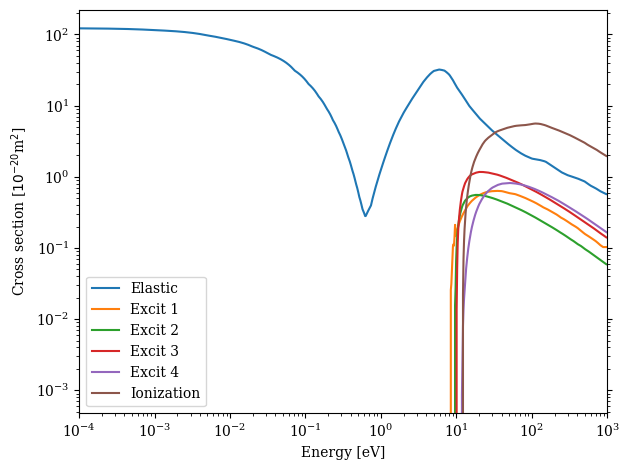

In [5]:

coll1 = np.array([i.split() for i in coll1.split("\n")], dtype=float)
coll2 = np.array([i.split() for i in coll2.split("\n")], dtype=float)
coll3 = np.array([i.split() for i in coll3.split("\n")], dtype=float)
coll4 = np.array([i.split() for i in coll4.split("\n")], dtype=float)
coll5 = np.array([i.split() for i in coll5.split("\n")], dtype=float)
ioniz = np.array([i.split() for i in ioniz.split("\n")], dtype=float)
# coll4[:,1] = coll4[:,1]#/np.amax(coll4[:,1])*.8e-22
# coll4[:,0] = coll4[:,0]
                                
xarray = np.logspace(-4, 3, 1000)
coll1_interp = np.interp(xarray, coll1[:, 0], coll1[:, 1])
coll2_interp = np.interp(xarray, coll2[:, 0], coll2[:, 1])
coll3_interp = np.interp(xarray, coll3[:, 0], coll3[:, 1])
coll4_interp = np.interp(xarray, coll4[:, 0], coll4[:, 1])
coll5_interp = np.interp(xarray, coll5[:, 0], coll5[:, 1])
ioniz_interp = np.interp(xarray, ioniz[:, 0], ioniz[:, 1])

fig, ax = plt.subplots()
# plt.plot(cross_sec[:,0], cross_sec[:,1]*1e20)
plt.plot(xarray, coll1_interp*1e20, label = "Elastic")
plt.plot(xarray, coll2_interp*1e20, label = "Excit 1")
plt.plot(xarray, coll3_interp*1e20, label = "Excit 2")
plt.plot(xarray, coll4_interp*1e20, label = "Excit 3")
plt.plot(xarray, coll5_interp*1e20, label = "Excit 4")
plt.plot(xarray, ioniz_interp*1e20, label = "Ionization")

plt.legend()
plt.xlabel('Energy [eV]')
plt.ylabel('Cross section [$10^{-20}$m$^2$]')
plt.xlim(1e-4, 1000)
# plt.ylim(0, 6)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.grid(False)
# plt.savefig("images_compare_Kel/cross_sec_xe.png", dpi=300, transparent=True)

# axins = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
# axins.plot(cross_sec[:,0], cross_sec[:,1]*1e20)
# x1, x2, y1, y2 = 0, 20, 0, .5
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xticklabels([])
# axins.set_yticklabels([])
# axins.set_yticks([0, 1])
# axins.set_xticks([0, .5])
# plt.savefig("elec_cross_sec.png", dpi=300, transparent=True)
# ax.indicate_inset_zoom(axins, edgecolor="black")

2.55e-14
1.82e-13
2.04e-13
1.69e-13


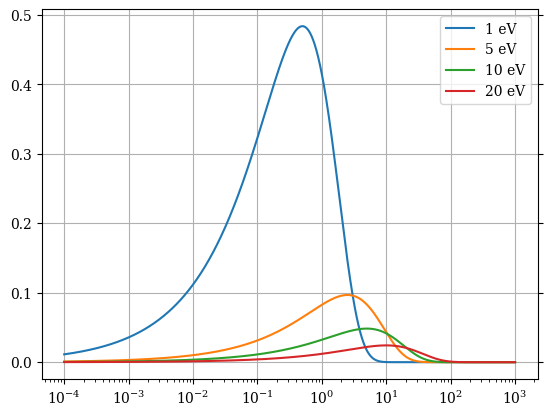

In [12]:
# energies = np.arange(0, 200, 0.0001)
distr0 = max_distrib(1, xarray)
distr1 = max_distrib(5, xarray)
distr2 = max_distrib(10, xarray)
distr3 = max_distrib(20, xarray)

print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr0[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr1[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr2[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr3[1:])))


plt.figure()
plt.plot(xarray, distr0, label = "1 eV")
plt.plot(xarray, distr1, label = "5 eV")
plt.plot(xarray, distr2, label = "10 eV")
plt.plot(xarray, distr3, label = "20 eV")
plt.xscale('log')
plt.legend()


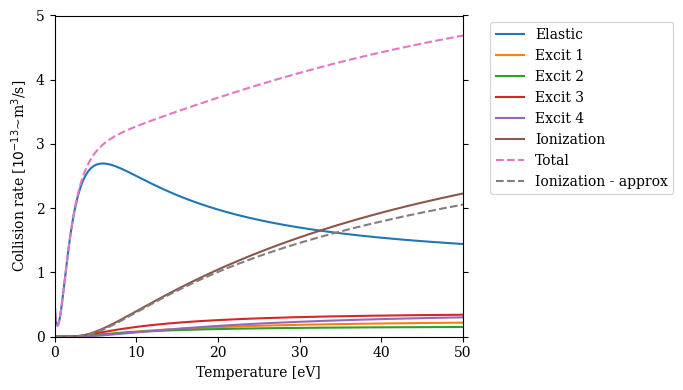

In [7]:

Tvec = []
int_result1 = []
int_result2 = []
int_result3 = []
int_result4 = []
int_result5 = []
int_result6 = []

# for ind in range(50):
for ind in np.linspace(0.001,50, 1000):
    distr = max_distrib(ind, xarray)
    int_result1.append(integrate_fct(xarray[1:], coll1_interp[1:], distr[1:]))
    int_result2.append(integrate_fct(xarray[1:], coll2_interp[1:], distr[1:]))
    int_result3.append(integrate_fct(xarray[1:], coll3_interp[1:], distr[1:]))
    int_result4.append(integrate_fct(xarray[1:], coll4_interp[1:], distr[1:]))
    int_result5.append(integrate_fct(xarray[1:], coll5_interp[1:], distr[1:]))
    int_result6.append(integrate_fct(xarray[1:], ioniz_interp[1:], distr[1:]))
    Tvec.append(ind)

phi_iz = 12.1
Kiz = 1.8*10**-13*(1.5*np.array(Tvec)/phi_iz)**.25 * np.exp(-4/3*phi_iz/np.array(Tvec))

plt.figure(figsize=(7, 4))
plt.plot(Tvec, np.array(int_result1)*1e13, label = "Elastic")
plt.plot(Tvec, np.array(int_result2)*1e13, label = "Excit 1")
plt.plot(Tvec, np.array(int_result3)*1e13, label = "Excit 2")
plt.plot(Tvec, np.array(int_result4)*1e13, label = "Excit 3")
plt.plot(Tvec, np.array(int_result5)*1e13, label = "Excit 4")
plt.plot(Tvec, np.array(int_result6)*1e13, label = "Ionization")
plt.plot(Tvec, (np.array(int_result1) + np.array(int_result2) + np.array(int_result3) + np.array(int_result4) + np.array(int_result5) + np.array(int_result6))*1e13, ls="--", label = "Total")

plt.plot(Tvec, Kiz*1e13, ls="--", label = "Ionization - approx")


plt.xlabel("Temperature [eV]")
plt.ylabel("Collision rate [$10^{-13}$~m$^3$/s]")
plt.grid(False)
plt.xlim(0, 50)
plt.ylim(0, 5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# plt.savefig("images_compare_Kel/collision_rate.png", dpi=300, transparent=True)

## Krypton

In [8]:
xarray = np.logspace(-4, 3, 1000)

# cross_sec = np.loadtxt('elastic.txt')
coll1 = """   0.000000e+0	3.447540e-19
 1.000000e-4	3.447540e-19
 1.000000e-3	3.310000e-19
 3.000000e-3	3.000000e-19
 5.000000e-3	2.790000e-19
 7.000000e-3	2.620000e-19
 1.000000e-2	2.420000e-19
 1.500000e-2	2.160000e-19
 2.000000e-2	1.950000e-19
 3.514000e-2	1.493300e-19
 7.152000e-2	9.140250e-20
 1.091700e-1	6.042430e-20
 1.481500e-1	4.028030e-20
 1.885000e-1	2.715650e-20
 2.302700e-1	1.834800e-20
 2.735000e-1	1.198630e-20
 3.182600e-1	7.393130e-21
 3.645800e-1	4.207040e-21
 4.125400e-1	2.231110e-21
 4.621800e-1	1.329620e-21
 5.135600e-1	1.009430e-21
 5.667500e-1	1.136880e-21
 6.218100e-1	1.517440e-21
 6.788000e-1	2.097760e-21
 7.378000e-1	2.824930e-21
 7.988700e-1	3.731510e-21
 8.620900e-1	4.698550e-21
 9.275200e-1	5.869940e-21
 9.952600e-1	7.292590e-21
 1.065380e+0	8.902680e-21
 1.137960e+0	1.079130e-20
 1.213090e+0	1.288960e-20
 1.290870e+0	1.468070e-20
 1.371370e+0	1.666340e-20
 1.454710e+0	1.876390e-20
 1.540970e+0	2.101710e-20
 1.630270e+0	2.348180e-20
 1.722700e+0	2.610590e-20
 1.818380e+0	2.872720e-20
 1.917430e+0	3.155480e-20
 2.019950e+0	3.450950e-20
 2.126080e+0	3.726160e-20
 2.235940e+0	4.018350e-20
 2.349650e+0	4.328440e-20
 2.467370e+0	4.657400e-20
 2.589220e+0	5.022760e-20
 2.715350e+0	5.417950e-20
 2.845920e+0	5.838640e-20
 2.981070e+0	6.286320e-20
 3.120980e+0	6.735680e-20
 3.265800e+0	7.207120e-20
 3.415700e+0	7.686130e-20
 3.570880e+0	8.185310e-20
 3.731510e+0	8.679890e-20
 3.897790e+0	9.191850e-20
 4.069910e+0	9.716020e-20
 4.248070e+0	1.024490e-19
 4.432500e+0	1.079660e-19
 4.623410e+0	1.136740e-19
 4.821030e+0	1.196760e-19
 5.025600e+0	1.262940e-19
 5.237350e+0	1.329340e-19
 5.456540e+0	1.384150e-19
 5.683440e+0	1.440870e-19
 5.918310e+0	1.499580e-19
 6.161430e+0	1.552470e-19
 6.413100e+0	1.602740e-19
 6.673610e+0	1.654880e-19
 6.943280e+0	1.708730e-19
 7.222430e+0	1.751390e-19
 7.511380e+0	1.791160e-19
 7.810490e+0	1.821270e-19
 8.120110e+0	1.843770e-19
 8.772370e+0	1.863430e-19
 9.471290e+0	1.840690e-19
 9.839270e+0	1.819100e-19
 1.022018e+1	1.789030e-19
 1.061449e+1	1.753150e-19
 1.102264e+1	1.717060e-19
 1.144515e+1	1.664210e-19
 1.188250e+1	1.613140e-19
 1.233521e+1	1.557630e-19
 1.280384e+1	1.502080e-19
 1.328894e+1	1.443340e-19
 1.379108e+1	1.383530e-19
 1.431087e+1	1.323970e-19
 1.484893e+1	1.265560e-19
 1.540590e+1	1.203260e-19
 1.598244e+1	1.141790e-19
 1.657924e+1	1.081260e-19
 1.719701e+1	1.023990e-19
 1.783649e+1	9.698660e-20
 1.849845e+1	9.186940e-20
 1.918366e+1	8.703110e-20
 1.989296e+1	8.245560e-20
 2.062719e+1	7.757970e-20
 2.138721e+1	7.291040e-20
 2.217395e+1	6.852900e-20
 2.298833e+1	6.441710e-20
 2.383133e+1	6.055760e-20
 2.470396e+1	5.693440e-20
 2.560725e+1	5.353260e-20
 2.654229e+1	5.033820e-20
 2.751018e+1	4.733830e-20
 2.851209e+1	4.452050e-20
 2.954921e+1	4.187360e-20
 3.062278e+1	3.936340e-20
 3.173407e+1	3.699010e-20
 3.288442e+1	3.476210e-20
 3.407519e+1	3.267050e-20
 3.530781e+1	3.070670e-20
 3.658374e+1	2.886270e-20
 3.790451e+1	2.713100e-20
 3.927170e+1	2.550460e-20
 4.068694e+1	2.401650e-20
 4.215191e+1	2.265660e-20
 4.366836e+1	2.137470e-20
 4.523810e+1	2.016620e-20
 4.686301e+1	1.902690e-20
 4.854502e+1	1.795280e-20
 5.028614e+1	1.700460e-20
 5.208844e+1	1.642730e-20
 5.395409e+1	1.587000e-20
 5.588529e+1	1.533190e-20
 5.788437e+1	1.481240e-20
 5.995369e+1	1.431080e-20
 6.431306e+1	1.404620e-20
 6.898420e+1	1.379440e-20
 7.398942e+1	1.354730e-20
 7.935261e+1	1.340050e-20
 8.812509e+1	1.321740e-20
 9.785531e+1	1.303700e-20
 1.013293e+2	1.284520e-20
 1.049254e+2	1.244530e-20
 1.086478e+2	1.205800e-20
 1.125011e+2	1.168280e-20
 1.164898e+2	1.131950e-20
 1.206186e+2	1.096750e-20
 1.248925e+2	1.062660e-20
 1.293167e+2	1.029630e-20
 1.338963e+2	9.976410e-21
 1.386368e+2	9.666530e-21
 1.435440e+2	9.366350e-21
 1.486236e+2	9.075560e-21
 1.538817e+2	8.906350e-21
 1.593245e+2	8.780500e-21
 1.649587e+2	8.656450e-21
 1.707908e+2	8.534190e-21
 1.768279e+2	8.413670e-21
 1.830772e+2	8.294880e-21
 1.895461e+2	8.177790e-21
 1.962423e+2	8.062370e-21
 2.031738e+2	7.930980e-21
 2.103489e+2	7.780940e-21
 2.177762e+2	7.633760e-21
 2.254644e+2	7.489380e-21
 2.334229e+2	7.347760e-21
 2.416610e+2	7.208830e-21
 2.501886e+2	7.072550e-21
 2.590160e+2	6.938870e-21
 2.681535e+2	6.807730e-21
 2.776121e+2	6.679080e-21
 2.874031e+2	6.552890e-21
 2.975383e+2	6.429090e-21
 3.080295e+2	6.300940e-21
 3.188895e+2	6.173310e-21
 3.301311e+2	6.048290e-21
 3.417678e+2	5.925800e-21
 3.538134e+2	5.805820e-21
 3.662823e+2	5.688270e-21
 3.791894e+2	5.573110e-21
 3.925501e+2	5.460290e-21
 4.063803e+2	5.330630e-21
 4.206965e+2	5.181950e-21
 4.355158e+2	5.037420e-21
 4.508559e+2	4.896940e-21
 4.667351e+2	4.760390e-21
 4.831724e+2	4.627650e-21
 5.001872e+2	4.499410e-21
 5.178000e+2	4.445230e-21
 5.360318e+2	4.391710e-21
 5.549043e+2	4.338840e-21
 5.744399e+2	4.286600e-21
 5.946621e+2	4.235000e-21
 6.155950e+2	4.184020e-21
 6.372635e+2	4.133660e-21
 6.596934e+2	4.083910e-21
 6.829117e+2	4.034760e-21
 7.069458e+2	3.968270e-21
 7.318245e+2	3.859100e-21
 7.575776e+2	3.752940e-21
 7.842356e+2	3.649700e-21
 8.118305e+2	3.549310e-21
 8.403951e+2	3.451680e-21
 8.699636e+2	3.356740e-21
 9.005711e+2	3.264420e-21
 9.322543e+2	3.174630e-21
 9.650509e+2	3.087330e-21 """

coll2 = """ 9.915000e+0	0.000000e+0
 9.915100e+0	6.599850e-26
 9.950140e+0	2.429680e-23
 9.986520e+0	4.883550e-23
 1.002417e+1	7.396820e-23
 1.006315e+1	1.084690e-22
 1.010350e+1	2.712820e-22
 1.014527e+1	1.022570e-21
 1.018850e+1	2.574830e-22
 1.023326e+1	2.726010e-22
 1.027958e+1	3.142160e-22
 1.032754e+1	3.575080e-22
 1.037718e+1	4.016880e-22
 1.042856e+1	4.462770e-22
 1.048175e+1	4.914880e-22
 1.053681e+1	5.386570e-22
 1.059380e+1	5.876710e-22
 1.065280e+1	6.479130e-22
 1.071387e+1	7.126740e-22
 1.077709e+1	7.841080e-22
 1.084252e+1	8.567770e-22
 1.091026e+1	9.312890e-22
 1.098038e+1	1.008420e-21
 1.105296e+1	1.081200e-21
 1.112809e+1	1.153820e-21
 1.120587e+1	1.229010e-21
 1.128637e+1	1.306830e-21
 1.136971e+1	1.380410e-21
 1.145597e+1	1.455180e-21
 1.154527e+1	1.532570e-21
 1.163770e+1	1.608280e-21
 1.173338e+1	1.680040e-21
 1.183243e+1	1.754320e-21
 1.193495e+1	1.831210e-21
 1.204108e+1	1.905470e-21
 1.215094e+1	1.973580e-21
 1.226465e+1	2.044090e-21
 1.238237e+1	2.117070e-21
 1.250422e+1	2.192110e-21
 1.263035e+1	2.255180e-21
 1.276092e+1	2.320460e-21
 1.289607e+1	2.388040e-21
 1.303598e+1	2.455110e-21
 1.318080e+1	2.515930e-21
 1.333070e+1	2.578900e-21
 1.348588e+1	2.644070e-21
 1.364651e+1	2.699810e-21
 1.381279e+1	2.756350e-21
 1.398491e+1	2.814870e-21
 1.416307e+1	2.865660e-21
 1.434750e+1	2.917300e-21
 1.453841e+1	2.969220e-21
 1.473603e+1	3.016650e-21
 1.494060e+1	3.065740e-21
 1.515235e+1	3.110470e-21
 1.537154e+1	3.154310e-21
 1.559844e+1	3.195750e-21
 1.583331e+1	3.233330e-21
 1.607643e+1	3.269170e-21
 1.632810e+1	3.299370e-21
 1.658861e+1	3.330630e-21
 1.685828e+1	3.362990e-21
 1.713743e+1	3.392370e-21
 1.742638e+1	3.418370e-21
 1.772549e+1	3.445290e-21
 1.803511e+1	3.472110e-21
 1.835561e+1	3.491340e-21
 1.868737e+1	3.511240e-21
 1.903079e+1	3.531230e-21
 1.938629e+1	3.545450e-21
 1.975427e+1	3.560170e-21
 2.013518e+1	3.572700e-21
 2.052949e+1	3.580590e-21
 2.093764e+1	3.588750e-21
 2.136015e+1	3.597200e-21
 2.179750e+1	3.605950e-21
 2.225021e+1	3.610000e-21
 2.271884e+1	3.610000e-21
 2.320394e+1	3.610000e-21
 2.370608e+1	3.610000e-21
 2.422587e+1	3.606990e-21
 2.476393e+1	3.599810e-21
 2.532090e+1	3.592390e-21
 2.589744e+1	3.584700e-21
 2.649424e+1	3.576740e-21
 2.711201e+1	3.567760e-21
 2.775149e+1	3.554970e-21
 2.841345e+1	3.541730e-21
 2.909866e+1	3.528030e-21
 2.980796e+1	3.513840e-21
 3.054219e+1	3.495540e-21
 3.130221e+1	3.475270e-21
 3.208895e+1	3.454290e-21
 3.290333e+1	3.432580e-21
 3.374633e+1	3.410100e-21
 3.461896e+1	3.386830e-21
 3.552225e+1	3.362740e-21
 3.645729e+1	3.337420e-21
 3.742518e+1	3.310810e-21
 3.842709e+1	3.283250e-21
 3.946421e+1	3.254730e-21
 4.053778e+1	3.226560e-21
 4.164907e+1	3.198770e-21
 4.279942e+1	3.170010e-21
 4.399019e+1	3.140250e-21
 4.522281e+1	3.109430e-21
 4.649874e+1	3.077530e-21
 4.781951e+1	3.044510e-21
 4.918670e+1	3.010330e-21
 5.060194e+1	2.974950e-21
 5.206691e+1	2.938330e-21
 5.358336e+1	2.900420e-21
 5.515310e+1	2.865020e-21
 5.677801e+1	2.829810e-21
 5.846002e+1	2.793370e-21
 6.020114e+1	2.755980e-21
 6.200344e+1	2.719930e-21
 6.386909e+1	2.682620e-21
 6.580029e+1	2.643990e-21
 6.779937e+1	2.604010e-21
 6.986869e+1	2.562630e-21
 7.201073e+1	2.525820e-21
 7.422806e+1	2.488120e-21
 7.652330e+1	2.449100e-21
 7.889920e+1	2.408710e-21
 8.135860e+1	2.370980e-21
 8.390442e+1	2.335340e-21
 8.653971e+1	2.298440e-21
 8.926761e+1	2.260250e-21
 9.209138e+1	2.222810e-21
 9.501438e+1	2.184810e-21
 9.804009e+1	2.145480e-21
 1.011721e+2	2.107110e-21
 1.044143e+2	2.071440e-21
 1.077703e+2	2.034530e-21
 1.112443e+2	1.996310e-21
 1.148404e+2	1.956760e-21
 1.185628e+2	1.915810e-21
 1.224161e+2	1.879460e-21
 1.264048e+2	1.845560e-21
 1.305336e+2	1.810460e-21
 1.348075e+2	1.774140e-21
 1.392317e+2	1.736530e-21
 1.438113e+2	1.704590e-21
 1.485518e+2	1.672990e-21
 1.534590e+2	1.640270e-21
 1.585386e+2	1.606410e-21
 1.637967e+2	1.571360e-21
 1.692395e+2	1.535070e-21
 1.748737e+2	1.505630e-21
 1.807058e+2	1.476470e-21
 1.867429e+2	1.446290e-21
 1.929922e+2	1.415040e-21
 1.994611e+2	1.382690e-21
 2.061573e+2	1.355370e-21
 2.130888e+2	1.327640e-21
 2.202639e+2	1.298940e-21
 2.276912e+2	1.269240e-21
 2.353794e+2	1.238480e-21
 2.433379e+2	1.209990e-21
 2.515760e+2	1.185270e-21
 2.601036e+2	1.159690e-21
 2.689310e+2	1.133210e-21
 2.780685e+2	1.105790e-21
 2.875271e+2	1.080810e-21
 2.973182e+2	1.055840e-21
 3.074533e+2	1.029990e-21
 3.179445e+2	1.003240e-21
 3.288045e+2	9.803910e-22
 3.400461e+2	9.579080e-22
 3.516828e+2	9.346340e-22
 3.637284e+2	9.116620e-22
 3.761973e+2	8.904650e-22
 3.891044e+2	8.685230e-22
 4.024651e+2	8.465490e-22
 4.162953e+2	8.271870e-22
 4.306115e+2	8.071440e-22
 4.454308e+2	7.863970e-22
 4.607709e+2	7.675060e-22
 4.766501e+2	7.490860e-22
 4.930874e+2	7.300190e-22
 5.101022e+2	7.127060e-22
 5.277150e+2	6.965020e-22
 5.459468e+2	6.797290e-22
 5.648193e+2	6.623660e-22
 5.843549e+2	6.443930e-22
 6.045771e+2	6.268420e-22
 6.255100e+2	6.123980e-22
 6.471785e+2	5.974470e-22
 6.696084e+2	5.819700e-22
 6.928266e+2	5.659500e-22
 7.168608e+2	5.517270e-22
 7.417395e+2	5.380430e-22
 7.674926e+2	5.238790e-22
 7.941506e+2	5.092170e-22
 8.217455e+2	4.973020e-22
 8.503101e+2	4.858760e-22
 8.798786e+2	4.740490e-22
 9.104861e+2	4.618060e-22
 9.421693e+2	4.491320e-22
 9.749659e+2	4.360140e-22"""

coll3 = """ 1.130000e+1	0.000000e+0
 1.131000e+1	1.586940e-26
 1.133914e+1	5.576850e-24
 1.137552e+1	1.128100e-23
 1.141317e+1	1.797220e-23
 1.145215e+1	2.742140e-23
 1.149250e+1	5.405140e-23
 1.153427e+1	8.710020e-23
 1.157750e+1	1.225520e-22
 1.162226e+1	1.596950e-22
 1.166858e+1	1.986100e-22
 1.171654e+1	2.380650e-22
 1.176618e+1	2.772800e-22
 1.181756e+1	3.175220e-22
 1.187075e+1	3.584780e-22
 1.192581e+1	3.998420e-22
 1.198280e+1	4.414470e-22
 1.204180e+1	4.828420e-22
 1.210287e+1	5.248940e-22
 1.216609e+1	5.666170e-22
 1.223152e+1	6.091760e-22
 1.229926e+1	6.525280e-22
 1.236938e+1	6.946280e-22
 1.244196e+1	7.373380e-22
 1.251709e+1	7.804020e-22
 1.259487e+1	8.231770e-22
 1.267537e+1	8.651940e-22
 1.275871e+1	9.073540e-22
 1.284497e+1	9.495870e-22
 1.293427e+1	9.910780e-22
 1.302670e+1	1.030680e-21
 1.312238e+1	1.068950e-21
 1.322143e+1	1.108570e-21
 1.332395e+1	1.149580e-21
 1.343008e+1	1.192030e-21
 1.353994e+1	1.231980e-21
 1.365365e+1	1.266100e-21
 1.377137e+1	1.301410e-21
 1.389322e+1	1.337970e-21
 1.401935e+1	1.375030e-21
 1.414992e+1	1.408980e-21
 1.428507e+1	1.444120e-21
 1.442498e+1	1.480490e-21
 1.456980e+1	1.512560e-21
 1.471970e+1	1.539550e-21
 1.487488e+1	1.567480e-21
 1.503551e+1	1.594970e-21
 1.520179e+1	1.618250e-21
 1.537391e+1	1.642350e-21
 1.555207e+1	1.665210e-21
 1.573650e+1	1.683650e-21
 1.592741e+1	1.702740e-21
 1.612503e+1	1.717500e-21
 1.632960e+1	1.729780e-21
 1.654135e+1	1.742480e-21
 1.676054e+1	1.755630e-21
 1.698744e+1	1.769250e-21
 1.722231e+1	1.776670e-21
 1.746543e+1	1.783960e-21
 1.771710e+1	1.791510e-21
 1.797761e+1	1.799330e-21
 1.824728e+1	1.797530e-21
 1.852643e+1	1.794740e-21
 1.881538e+1	1.791850e-21
 1.911449e+1	1.787710e-21
 1.942411e+1	1.781520e-21
 1.974461e+1	1.775110e-21
 2.007637e+1	1.767330e-21
 2.041979e+1	1.755310e-21
 2.077529e+1	1.742860e-21
 2.114327e+1	1.729990e-21
 2.152418e+1	1.716650e-21
 2.191849e+1	1.702850e-21
 2.232664e+1	1.685300e-21
 2.274915e+1	1.666290e-21
 2.318650e+1	1.646610e-21
 2.363921e+1	1.626240e-21
 2.410784e+1	1.604970e-21
 2.459294e+1	1.582330e-21
 2.509508e+1	1.558900e-21
 2.561487e+1	1.534640e-21
 2.615293e+1	1.509530e-21
 2.670990e+1	1.483540e-21
 2.728644e+1	1.457590e-21
 2.788324e+1	1.431730e-21
 2.850101e+1	1.404960e-21
 2.914049e+1	1.377250e-21
 2.980245e+1	1.348560e-21
 3.048766e+1	1.320490e-21
 3.119696e+1	1.292120e-21
 3.193119e+1	1.262750e-21
 3.269121e+1	1.232350e-21
 3.347795e+1	1.204070e-21
 3.429233e+1	1.176920e-21
 3.513533e+1	1.148820e-21
 3.600796e+1	1.119780e-21
 3.691125e+1	1.094940e-21
 3.784629e+1	1.069230e-21
 3.881418e+1	1.042610e-21
 3.981609e+1	1.015060e-21
 4.085321e+1	9.888830e-22
 4.192678e+1	9.623120e-22
 4.303807e+1	9.348080e-22
 4.418842e+1	9.074200e-22
 4.537919e+1	8.847950e-22
 4.661181e+1	8.613760e-22
 4.788774e+1	8.371330e-22
 4.920851e+1	8.120380e-22
 5.057570e+1	7.880770e-22
 5.199094e+1	7.661400e-22
 5.345591e+1	7.434330e-22
 5.497236e+1	7.226830e-22
 5.654210e+1	7.028000e-22
 5.816701e+1	6.822180e-22
 5.984902e+1	6.609120e-22
 6.159014e+1	6.437350e-22
 6.339244e+1	6.264330e-22
 6.525809e+1	6.085220e-22
 6.718929e+1	5.899830e-22
 6.918837e+1	5.707920e-22
 7.125769e+1	5.540700e-22
 7.339973e+1	5.388620e-22
 7.561706e+1	5.231190e-22
 7.791230e+1	5.068230e-22
 8.028820e+1	4.904730e-22
 8.274760e+1	4.774380e-22
 8.529342e+1	4.639450e-22
 8.792871e+1	4.499780e-22
 9.065661e+1	4.362420e-22
 9.348038e+1	4.243820e-22
 9.640338e+1	4.121060e-22
 9.942909e+1	3.993980e-22
 1.025611e+2	3.890600e-22
 1.058033e+2	3.790100e-22
 1.091593e+2	3.686060e-22
 1.126333e+2	3.578370e-22
 1.162294e+2	3.466890e-22
 1.199518e+2	3.351490e-22
 1.238051e+2	3.266290e-22
 1.277938e+2	3.178540e-22
 1.319226e+2	3.087700e-22
 1.361965e+2	2.993680e-22
 1.406207e+2	2.900480e-22
 1.452003e+2	2.830260e-22
 1.499408e+2	2.757570e-22
 1.548480e+2	2.682330e-22
 1.599276e+2	2.604440e-22
 1.651857e+2	2.523820e-22
 1.706285e+2	2.443500e-22
 1.762627e+2	2.385290e-22
 1.820948e+2	2.325020e-22
 1.881319e+2	2.262640e-22
 1.943812e+2	2.198060e-22
 2.008501e+2	2.133410e-22
 2.075463e+2	2.081520e-22
 2.144778e+2	2.027800e-22
 2.216529e+2	1.972190e-22
 2.290802e+2	1.914630e-22
 2.367684e+2	1.855040e-22
 2.447269e+2	1.804000e-22
 2.529650e+2	1.758690e-22
 2.614926e+2	1.711790e-22
 2.703200e+2	1.663240e-22
 2.794575e+2	1.612980e-22
 2.889161e+2	1.574340e-22
 2.987072e+2	1.535170e-22
 3.088423e+2	1.494630e-22
 3.193335e+2	1.452670e-22
 3.301935e+2	1.416870e-22
 3.414351e+2	1.380340e-22
 3.530718e+2	1.342520e-22
 3.651174e+2	1.305930e-22
 3.775863e+2	1.271640e-22
 3.904934e+2	1.236140e-22
 4.038541e+2	1.201520e-22
 4.176843e+2	1.171090e-22
 4.320005e+2	1.139600e-22
 4.468198e+2	1.107000e-22
 4.621599e+2	1.078110e-22
 4.780391e+2	1.049530e-22
 4.944764e+2	1.019940e-22
 5.114912e+2	9.939120e-23
 5.291040e+2	9.692540e-23
 5.473358e+2	9.437300e-23
 5.662083e+2	9.173080e-23
 5.857439e+2	8.899580e-23
 6.059661e+2	8.640340e-23
 6.268990e+2	8.431010e-23
 6.485675e+2	8.214320e-23
 6.709974e+2	7.990030e-23
 6.942156e+2	7.757840e-23
 7.182498e+2	7.554000e-23
 7.431285e+2	7.354970e-23
 7.688816e+2	7.148950e-23
 7.955396e+2	6.935680e-23
 8.231345e+2	6.772760e-23
 8.516991e+2	6.615650e-23
 8.812676e+2	6.453030e-23
 9.118751e+2	6.284690e-23
 9.435583e+2	6.110430e-23
 9.763549e+2	5.930050e-23 """

coll4 = """1.199800e+1	0.000000e+0
 1.200000e+1	2.692310e-26
 1.203314e+1	9.461340e-24
 1.206952e+1	1.907500e-23
 1.210717e+1	3.725970e-23
 1.214615e+1	9.299970e-23
 1.218650e+1	1.506990e-22
 1.222827e+1	2.090110e-22
 1.227150e+1	2.686740e-22
 1.231626e+1	3.296220e-22
 1.236258e+1	3.912360e-22
 1.241054e+1	4.545940e-22
 1.246018e+1	5.186290e-22
 1.251156e+1	5.845670e-22
 1.256475e+1	6.515860e-22
 1.261981e+1	7.201680e-22
 1.267680e+1	7.897010e-22
 1.273580e+1	8.606030e-22
 1.279687e+1	9.332760e-22
 1.286009e+1	1.004900e-21
 1.292553e+1	1.078080e-21
 1.299326e+1	1.152590e-21
 1.306338e+1	1.229720e-21
 1.313596e+1	1.309560e-21
 1.321109e+1	1.391090e-21
 1.328887e+1	1.468870e-21
 1.336937e+1	1.549370e-21
 1.345271e+1	1.630070e-21
 1.353897e+1	1.712020e-21
 1.362827e+1	1.795440e-21
 1.372070e+1	1.878630e-21
 1.381638e+1	1.963930e-21
 1.391543e+1	2.048110e-21
 1.401795e+1	2.133640e-21
 1.412408e+1	2.214300e-21
 1.423394e+1	2.297790e-21
 1.434765e+1	2.384220e-21
 1.446537e+1	2.473680e-21
 1.458722e+1	2.555820e-21
 1.471335e+1	2.636550e-21
 1.484392e+1	2.720110e-21
 1.497907e+1	2.806610e-21
 1.511898e+1	2.881870e-21
 1.526380e+1	2.957170e-21
 1.541370e+1	3.035130e-21
 1.556888e+1	3.111690e-21
 1.572951e+1	3.185580e-21
 1.589579e+1	3.262060e-21
 1.606791e+1	3.333090e-21
 1.624607e+1	3.393670e-21
 1.643050e+1	3.456370e-21
 1.662141e+1	3.521280e-21
 1.681903e+1	3.588470e-21
 1.702360e+1	3.655430e-21
 1.723535e+1	3.704130e-21
 1.745454e+1	3.754540e-21
 1.768144e+1	3.806730e-21
 1.791631e+1	3.860750e-21
 1.815943e+1	3.903920e-21
 1.841110e+1	3.941670e-21
 1.867162e+1	3.980740e-21
 1.894128e+1	4.021190e-21
 1.922043e+1	4.049840e-21
 1.950938e+1	4.075840e-21
 1.980849e+1	4.102760e-21
 2.011811e+1	4.122360e-21
 2.043861e+1	4.128770e-21
 2.077037e+1	4.135410e-21
 2.111379e+1	4.142280e-21
 2.146929e+1	4.149390e-21
 2.183727e+1	4.156750e-21
 2.221818e+1	4.154550e-21
 2.261249e+1	4.144690e-21
 2.302064e+1	4.134480e-21
 2.344315e+1	4.123920e-21
 2.388050e+1	4.112990e-21
 2.433321e+1	4.091120e-21
 2.480184e+1	4.064560e-21
 2.528694e+1	4.037070e-21
 2.578908e+1	4.008620e-21
 2.630887e+1	3.979160e-21
 2.684693e+1	3.948670e-21
 2.740390e+1	3.911730e-21
 2.798044e+1	3.871370e-21
 2.857724e+1	3.829590e-21
 2.919501e+1	3.786350e-21
 2.983449e+1	3.741590e-21
 3.049645e+1	3.695250e-21
 3.118166e+1	3.647280e-21
 3.189096e+1	3.597630e-21
 3.262519e+1	3.546240e-21
 3.338521e+1	3.493040e-21
 3.417195e+1	3.437960e-21
 3.498633e+1	3.380960e-21
 3.582933e+1	3.321950e-21
 3.670196e+1	3.267880e-21
 3.760525e+1	3.213680e-21
 3.854029e+1	3.157580e-21
 3.950818e+1	3.099510e-21
 4.051009e+1	3.041940e-21
 4.154721e+1	2.984900e-21
 4.262078e+1	2.925860e-21
 4.373207e+1	2.864740e-21
 4.488242e+1	2.808820e-21
 4.607319e+1	2.753250e-21
 4.730581e+1	2.695730e-21
 4.858174e+1	2.636190e-21
 4.990251e+1	2.574550e-21
 5.126970e+1	2.522390e-21
 5.268494e+1	2.469310e-21
 5.414991e+1	2.415000e-21
 5.566636e+1	2.364450e-21
 5.723610e+1	2.312130e-21
 5.886101e+1	2.257970e-21
 6.054302e+1	2.205340e-21
 6.228414e+1	2.158330e-21
 6.408644e+1	2.109670e-21
 6.595209e+1	2.059290e-21
 6.788329e+1	2.007150e-21
 6.988237e+1	1.953180e-21
 7.195169e+1	1.910970e-21
 7.409373e+1	1.868130e-21
 7.631106e+1	1.823780e-21
 7.860630e+1	1.777870e-21
 8.098220e+1	1.734280e-21
 8.344160e+1	1.694930e-21
 8.598742e+1	1.654200e-21
 8.862271e+1	1.612040e-21
 9.135061e+1	1.572440e-21
 9.417438e+1	1.535730e-21
 9.709738e+1	1.497730e-21
 1.001231e+2	1.458770e-21
 1.032551e+2	1.427450e-21
 1.064973e+2	1.395030e-21
 1.098533e+2	1.361470e-21
 1.133273e+2	1.326730e-21
 1.169234e+2	1.290770e-21
 1.206458e+2	1.255160e-21
 1.244991e+2	1.226260e-21
 1.284878e+2	1.196340e-21
 1.326166e+2	1.165380e-21
 1.368905e+2	1.133320e-21
 1.413147e+2	1.103210e-21
 1.458943e+2	1.079550e-21
 1.506348e+2	1.055050e-21
 1.555420e+2	1.029700e-21
 1.606216e+2	1.003460e-21
 1.658797e+2	9.762880e-22
 1.713225e+2	9.499740e-22
 1.769567e+2	9.285650e-22
 1.827888e+2	9.064020e-22
 1.888259e+2	8.834610e-22
 1.950752e+2	8.597140e-22
 2.015441e+2	8.366770e-22
 2.082403e+2	8.179270e-22
 2.151718e+2	7.985190e-22
 2.223469e+2	7.784290e-22
 2.297742e+2	7.576320e-22
 2.374624e+2	7.361050e-22
 2.454209e+2	7.178870e-22
 2.536590e+2	7.009990e-22
 2.621866e+2	6.835170e-22
 2.710140e+2	6.654210e-22
 2.801515e+2	6.467580e-22
 2.896101e+2	6.316240e-22
 2.994011e+2	6.159580e-22
 3.095363e+2	5.997420e-22
 3.200275e+2	5.829650e-22
 3.308875e+2	5.691180e-22
 3.421291e+2	5.547850e-22
 3.537658e+2	5.399490e-22
 3.658114e+2	5.258980e-22
 3.782803e+2	5.128060e-22
 3.911874e+2	4.992530e-22
 4.045481e+2	4.861800e-22
 4.183783e+2	4.745620e-22
 4.326945e+2	4.625370e-22
 4.475138e+2	4.500880e-22
 4.628539e+2	4.387450e-22
 4.787331e+2	4.273120e-22
 4.951704e+2	4.154770e-22
 5.121852e+2	4.054200e-22
 5.297980e+2	3.959090e-22
 5.480298e+2	3.860640e-22
 5.669023e+2	3.758730e-22
 5.864379e+2	3.653230e-22
 6.066601e+2	3.552690e-22
 6.275930e+2	3.466870e-22
 6.492615e+2	3.378030e-22
 6.716915e+2	3.286060e-22
 6.949097e+2	3.190870e-22
 7.189438e+2	3.109380e-22
 7.438225e+2	3.029770e-22
 7.695756e+2	2.947360e-22
 7.962336e+2	2.862050e-22
 8.238285e+2	2.795190e-22
 8.523931e+2	2.729500e-22
 8.819616e+2	2.661490e-22
 9.125691e+2	2.591090e-22
 9.442523e+2	2.518220e-22
 9.770489e+2	2.442790e-22"""

coll5 = """1.275000e+1	0.000000e+0
 1.275100e+1	9.999960e-28
 1.278514e+1	3.514200e-25
 1.282152e+1	1.371530e-24
 1.285917e+1	2.896590e-24
 1.289815e+1	4.475240e-24
 1.293850e+1	7.572440e-24
 1.298027e+1	1.085110e-23
 1.302350e+1	1.550240e-23
 1.306826e+1	2.140990e-23
 1.311458e+1	2.752500e-23
 1.316254e+1	3.385500e-23
 1.321218e+1	4.118680e-23
 1.326356e+1	5.125810e-23
 1.331675e+1	6.168330e-23
 1.337181e+1	7.247480e-23
 1.342880e+1	8.534510e-23
 1.348780e+1	1.003890e-22
 1.354887e+1	1.159620e-22
 1.361209e+1	1.326260e-22
 1.367752e+1	1.522570e-22
 1.374526e+1	1.725790e-22
 1.381538e+1	1.943830e-22
 1.388796e+1	2.197870e-22
 1.396309e+1	2.460830e-22
 1.404087e+1	2.758370e-22
 1.412137e+1	3.090060e-22
 1.420471e+1	3.433400e-22
 1.429097e+1	3.788810e-22
 1.438027e+1	4.156700e-22
 1.447270e+1	4.537530e-22
 1.456838e+1	4.978240e-22
 1.466743e+1	5.453650e-22
 1.476995e+1	5.945770e-22
 1.487608e+1	6.455180e-22
 1.498594e+1	6.982500e-22
 1.509965e+1	7.578170e-22
 1.521737e+1	8.202050e-22
 1.533922e+1	8.847860e-22
 1.546535e+1	9.516370e-22
 1.559592e+1	1.023710e-21
 1.573107e+1	1.099400e-21
 1.587098e+1	1.177750e-21
 1.601580e+1	1.259320e-21
 1.616570e+1	1.347770e-21
 1.632088e+1	1.439320e-21
 1.648151e+1	1.534090e-21
 1.664779e+1	1.632190e-21
 1.681991e+1	1.733750e-21
 1.699807e+1	1.838860e-21
 1.718250e+1	1.947680e-21
 1.737341e+1	2.060310e-21
 1.757103e+1	2.176910e-21
 1.777560e+1	2.297600e-21
 1.798735e+1	2.422540e-21
 1.820654e+1	2.547730e-21
 1.843344e+1	2.677060e-21
 1.866831e+1	2.810940e-21
 1.891143e+1	2.949520e-21
 1.916310e+1	3.088080e-21
 1.942361e+1	3.228750e-21
 1.969328e+1	3.374370e-21
 1.997243e+1	3.525110e-21
 2.026138e+1	3.669380e-21
 2.056049e+1	3.817440e-21
 2.087011e+1	3.970700e-21
 2.119061e+1	4.129350e-21
 2.152237e+1	4.293570e-21
 2.186579e+1	4.463570e-21
 2.222129e+1	4.621830e-21
 2.258927e+1	4.774550e-21
 2.297018e+1	4.932630e-21
 2.336449e+1	5.096260e-21
 2.377264e+1	5.265650e-21
 2.419515e+1	5.425700e-21
 2.463250e+1	5.572940e-21
 2.508521e+1	5.725360e-21
 2.555384e+1	5.883130e-21
 2.603894e+1	6.046440e-21
 2.654108e+1	6.215500e-21
 2.706087e+1	6.385220e-21
 2.759893e+1	6.519730e-21
 2.815590e+1	6.658970e-21
 2.873244e+1	6.803110e-21
 2.932924e+1	6.952310e-21
 2.994701e+1	7.106750e-21
 3.058649e+1	7.229480e-21
 3.124845e+1	7.353040e-21
 3.193366e+1	7.480950e-21
 3.264296e+1	7.613350e-21
 3.337719e+1	7.731550e-21
 3.413721e+1	7.835420e-21
 3.492395e+1	7.942940e-21
 3.573833e+1	8.054240e-21
 3.658133e+1	8.143770e-21
 3.745396e+1	8.224490e-21
 3.835725e+1	8.308050e-21
 3.929229e+1	8.394540e-21
 4.026018e+1	8.474310e-21
 4.126209e+1	8.529410e-21
 4.229921e+1	8.586460e-21
 4.337278e+1	8.645500e-21
 4.448407e+1	8.692910e-21
 4.563442e+1	8.723580e-21
 4.682519e+1	8.755340e-21
 4.805781e+1	8.788210e-21
 4.933374e+1	8.822230e-21
 5.065451e+1	8.844910e-21
 5.202170e+1	8.855160e-21
 5.343694e+1	8.865780e-21
 5.490191e+1	8.863990e-21
 5.641836e+1	8.853880e-21
 5.798810e+1	8.843410e-21
 5.961301e+1	8.832580e-21
 6.129502e+1	8.805390e-21
 6.303614e+1	8.772310e-21
 6.483844e+1	8.738070e-21
 6.670409e+1	8.702620e-21
 6.863529e+1	8.665930e-21
 7.063437e+1	8.623510e-21
 7.270369e+1	8.569700e-21
 7.484573e+1	8.514010e-21
 7.706306e+1	8.456360e-21
 7.935830e+1	8.396680e-21
 8.173420e+1	8.329710e-21
 8.419360e+1	8.258390e-21
 8.673942e+1	8.184560e-21
 8.937471e+1	8.108130e-21
 9.210261e+1	8.029020e-21
 9.492638e+1	7.947130e-21
 9.784938e+1	7.862370e-21
 1.008751e+2	7.775930e-21
 1.040071e+2	7.689800e-21
 1.072493e+2	7.600650e-21
 1.106053e+2	7.508350e-21
 1.140793e+2	7.412820e-21
 1.176754e+2	7.313930e-21
 1.213978e+2	7.215750e-21
 1.252511e+2	7.121350e-21
 1.292398e+2	7.023630e-21
 1.333686e+2	6.922470e-21
 1.376425e+2	6.817760e-21
 1.420667e+2	6.715910e-21
 1.466463e+2	6.618210e-21
 1.513868e+2	6.517080e-21
 1.562940e+2	6.412390e-21
 1.613736e+2	6.304030e-21
 1.666317e+2	6.191860e-21
 1.720745e+2	6.084040e-21
 1.777087e+2	5.986380e-21
 1.835408e+2	5.885290e-21
 1.895779e+2	5.780650e-21
 1.958272e+2	5.672330e-21
 2.022961e+2	5.567280e-21
 2.089923e+2	5.471860e-21
 2.159238e+2	5.373090e-21
 2.230989e+2	5.270840e-21
 2.305262e+2	5.165000e-21
 2.382144e+2	5.055440e-21
 2.461729e+2	4.960560e-21
 2.544110e+2	4.867880e-21
 2.629386e+2	4.771940e-21
 2.717660e+2	4.672630e-21
 2.809035e+2	4.571420e-21
 2.903621e+2	4.481560e-21
 3.001531e+2	4.388540e-21
 3.102883e+2	4.292260e-21
 3.207795e+2	4.193960e-21
 3.316395e+2	4.109790e-21
 3.428811e+2	4.022670e-21
 3.545178e+2	3.932490e-21
 3.665634e+2	3.845700e-21
 3.790323e+2	3.761530e-21
 3.919394e+2	3.674410e-21
 4.053001e+2	3.590320e-21
 4.191303e+2	3.512870e-21
 4.334465e+2	3.432700e-21
 4.482658e+2	3.349710e-21
 4.636059e+2	3.277410e-21
 4.794851e+2	3.204370e-21
 4.959224e+2	3.128760e-21
 5.129372e+2	3.060840e-21
 5.305500e+2	2.993910e-21
 5.487818e+2	2.924630e-21
 5.676543e+2	2.852910e-21
 5.871899e+2	2.778680e-21
 6.074121e+2	2.708500e-21
 6.283450e+2	2.647800e-21
 6.500135e+2	2.584960e-21
 6.724434e+2	2.519910e-21
 6.956617e+2	2.452580e-21
 7.196958e+2	2.394700e-21
 7.445745e+2	2.337480e-21
 7.703276e+2	2.278250e-21
 7.969856e+2	2.216930e-21
 8.245805e+2	2.168210e-21
 8.531451e+2	2.119650e-21
 8.827136e+2	2.069390e-21
 9.133211e+2	2.017350e-21
 9.450043e+2	1.963490e-21
 9.778009e+2	1.907740e-21"""

ioniz = """1.399600e+1	0.000000e+0
 1.400000e+1	1.547620e-25
 1.403114e+1	5.438670e-23
 1.406752e+1	1.106850e-22
 1.410518e+1	1.689610e-22
 1.414415e+1	2.292850e-22
 1.418450e+1	2.917300e-22
 1.422627e+1	3.563690e-22
 1.426950e+1	4.232790e-22
 1.431426e+1	4.925400e-22
 1.436058e+1	5.642360e-22
 1.440854e+1	6.384510e-22
 1.445818e+1	7.152750e-22
 1.450956e+1	7.956810e-22
 1.456275e+1	8.829120e-22
 1.461781e+1	9.732090e-22
 1.467480e+1	1.066680e-21
 1.473380e+1	1.163430e-21
 1.479487e+1	1.263590e-21
 1.485809e+1	1.367260e-21
 1.492353e+1	1.474580e-21
 1.499126e+1	1.585670e-21
 1.506138e+1	1.716620e-21
 1.513396e+1	1.854530e-21
 1.520909e+1	1.997280e-21
 1.528687e+1	2.145050e-21
 1.536737e+1	2.298010e-21
 1.545071e+1	2.456350e-21
 1.553697e+1	2.626160e-21
 1.562627e+1	2.810110e-21
 1.571870e+1	3.000530e-21
 1.581438e+1	3.197630e-21
 1.591343e+1	3.401660e-21
 1.601595e+1	3.614140e-21
 1.612208e+1	3.841250e-21
 1.623194e+1	4.076340e-21
 1.634565e+1	4.319700e-21
 1.646337e+1	4.571610e-21
 1.658522e+1	4.839190e-21
 1.671135e+1	5.119200e-21
 1.684192e+1	5.409060e-21
 1.697707e+1	5.709100e-21
 1.711698e+1	6.012670e-21
 1.726180e+1	6.325480e-21
 1.741170e+1	6.649280e-21
 1.756688e+1	6.993830e-21
 1.772751e+1	7.363280e-21
 1.789379e+1	7.745710e-21
 1.806591e+1	8.131040e-21
 1.824407e+1	8.512320e-21
 1.842850e+1	8.907000e-21
 1.861941e+1	9.308380e-21
 1.881703e+1	9.719430e-21
 1.902160e+1	1.014750e-20
 1.923335e+1	1.061340e-20
 1.945254e+1	1.109560e-20
 1.967944e+1	1.155890e-20
 1.991431e+1	1.202860e-20
 2.015743e+1	1.249910e-20
 2.040910e+1	1.297730e-20
 2.066962e+1	1.347230e-20
 2.093928e+1	1.398460e-20
 2.121843e+1	1.447130e-20
 2.150738e+1	1.496250e-20
 2.180649e+1	1.547100e-20
 2.211611e+1	1.600900e-20
 2.243661e+1	1.658590e-20
 2.276837e+1	1.718310e-20
 2.311179e+1	1.779010e-20
 2.346729e+1	1.839440e-20
 2.383527e+1	1.902000e-20
 2.421618e+1	1.963510e-20
 2.461049e+1	2.024630e-20
 2.501864e+1	2.087890e-20
 2.544115e+1	2.153380e-20
 2.587850e+1	2.221170e-20
 2.633121e+1	2.286370e-20
 2.679984e+1	2.351980e-20
 2.728494e+1	2.419890e-20
 2.778708e+1	2.490190e-20
 2.830687e+1	2.558360e-20
 2.884493e+1	2.625620e-20
 2.940190e+1	2.695240e-20
 2.997844e+1	2.767300e-20
 3.057524e+1	2.824650e-20
 3.119301e+1	2.883340e-20
 3.183249e+1	2.944090e-20
 3.249445e+1	3.002030e-20
 3.317966e+1	3.060270e-20
 3.388896e+1	3.120560e-20
 3.462319e+1	3.170510e-20
 3.538321e+1	3.219910e-20
 3.616995e+1	3.271050e-20
 3.698433e+1	3.323980e-20
 3.782733e+1	3.378780e-20
 3.869996e+1	3.425000e-20
 3.960325e+1	3.470160e-20
 4.053829e+1	3.509380e-20
 4.150618e+1	3.544220e-20
 4.250809e+1	3.580290e-20
 4.354521e+1	3.617630e-20
 4.461878e+1	3.656280e-20
 4.573007e+1	3.694820e-20
 4.688042e+1	3.733930e-20
 4.807119e+1	3.774420e-20
 4.930381e+1	3.816330e-20
 5.057974e+1	3.855070e-20
 5.190051e+1	3.889410e-20
 5.326770e+1	3.924960e-20
 5.468294e+1	3.961760e-20
 5.614791e+1	3.997550e-20
 5.766436e+1	4.033940e-20
 5.923410e+1	4.071620e-20
 6.085901e+1	4.103740e-20
 6.254102e+1	4.130660e-20
 6.428214e+1	4.158510e-20
 6.608444e+1	4.178680e-20
 6.795009e+1	4.193600e-20
 6.988129e+1	4.209050e-20
 7.188037e+1	4.219400e-20
 7.394969e+1	4.229750e-20
 7.609173e+1	4.240460e-20
 7.830906e+1	4.251550e-20
 8.060430e+1	4.258190e-20
 8.298020e+1	4.251060e-20
 8.543960e+1	4.243680e-20
 8.798542e+1	4.236040e-20
 9.062071e+1	4.228140e-20
 9.334861e+1	4.219950e-20
 9.617238e+1	4.211480e-20
 9.909538e+1	4.202710e-20
 1.021211e+2	4.187270e-20
 1.052531e+2	4.168480e-20
 1.084953e+2	4.149030e-20
 1.118513e+2	4.128890e-20
 1.153253e+2	4.108050e-20
 1.189214e+2	4.086470e-20
 1.226438e+2	4.057530e-20
 1.264971e+2	4.024770e-20
 1.304858e+2	3.990870e-20
 1.346146e+2	3.955780e-20
 1.388885e+2	3.919450e-20
 1.433127e+2	3.883500e-20
 1.478923e+2	3.846860e-20
 1.526328e+2	3.808940e-20
 1.575400e+2	3.769680e-20
 1.626196e+2	3.731660e-20
 1.678777e+2	3.694860e-20
 1.733205e+2	3.656760e-20
 1.789547e+2	3.617320e-20
 1.847868e+2	3.574100e-20
 1.908239e+2	3.528820e-20
 1.970732e+2	3.481950e-20
 2.035421e+2	3.436620e-20
 2.102383e+2	3.392430e-20
 2.171698e+2	3.346680e-20
 2.243449e+2	3.299320e-20
 2.317722e+2	3.250300e-20
 2.394604e+2	3.199560e-20
 2.474189e+2	3.147040e-20
 2.556570e+2	3.100580e-20
 2.641846e+2	3.056240e-20
 2.730120e+2	3.010340e-20
 2.821495e+2	2.962820e-20
 2.916081e+2	2.913640e-20
 3.013992e+2	2.864260e-20
 3.115343e+2	2.822710e-20
 3.220255e+2	2.779700e-20
 3.328855e+2	2.735170e-20
 3.441271e+2	2.689080e-20
 3.557638e+2	2.641370e-20
 3.678094e+2	2.591980e-20
 3.802783e+2	2.540860e-20
 3.931854e+2	2.487940e-20
 4.065461e+2	2.440360e-20
 4.203763e+2	2.398870e-20
 4.346925e+2	2.355920e-20
 4.495118e+2	2.311460e-20
 4.648519e+2	2.265440e-20
 4.807311e+2	2.217810e-20
 4.971684e+2	2.168490e-20
 5.141832e+2	2.128800e-20
 5.317960e+2	2.090050e-20
 5.500278e+2	2.049940e-20
 5.689003e+2	2.008420e-20
 5.884359e+2	1.965440e-20
 6.086581e+2	1.924420e-20
 6.295910e+2	1.886740e-20
 6.512595e+2	1.847730e-20
 6.736894e+2	1.807360e-20
 6.969076e+2	1.765570e-20
 7.209418e+2	1.726490e-20
 7.458205e+2	1.686690e-20
 7.715736e+2	1.645480e-20
 7.982316e+2	1.602830e-20
 8.258265e+2	1.571590e-20
 8.543911e+2	1.540170e-20
 8.839596e+2	1.507640e-20
 9.145671e+2	1.475430e-20
 9.462503e+2	1.443750e-20
 9.790469e+2	1.410950e-20"""

coll1 = np.array([i.split() for i in coll1.split("\n")], dtype=float)
coll2 = np.array([i.split() for i in coll2.split("\n")], dtype=float)
coll3 = np.array([i.split() for i in coll3.split("\n")], dtype=float)
coll4 = np.array([i.split() for i in coll4.split("\n")], dtype=float)
coll5 = np.array([i.split() for i in coll5.split("\n")], dtype=float)
ioniz = np.array([i.split() for i in ioniz.split("\n")], dtype=float)


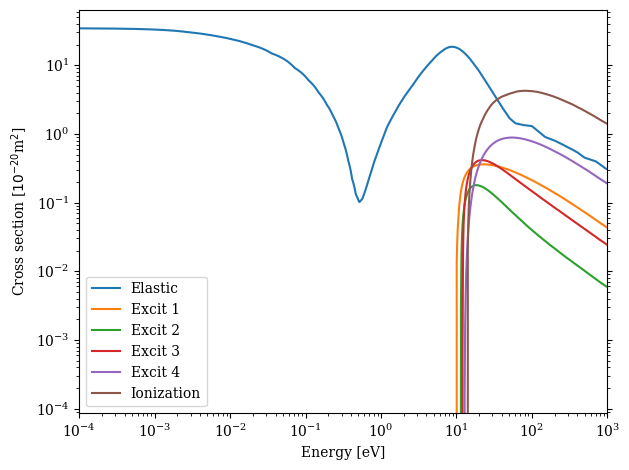

In [9]:
                                
xarray = np.logspace(-4, 3, 1000)
coll1_interp = np.interp(xarray, coll1[:, 0], coll1[:, 1])
coll2_interp = np.interp(xarray, coll2[:, 0], coll2[:, 1])
coll3_interp = np.interp(xarray, coll3[:, 0], coll3[:, 1])
coll4_interp = np.interp(xarray, coll4[:, 0], coll4[:, 1])
coll5_interp = np.interp(xarray, coll5[:, 0], coll5[:, 1])
ioniz_interp = np.interp(xarray, ioniz[:, 0], ioniz[:, 1])

fig, ax = plt.subplots()
# plt.plot(cross_sec[:,0], cross_sec[:,1]*1e20)
plt.plot(xarray, coll1_interp*1e20, label = "Elastic")
plt.plot(xarray, coll2_interp*1e20, label = "Excit 1")
plt.plot(xarray, coll3_interp*1e20, label = "Excit 2")
plt.plot(xarray, coll4_interp*1e20, label = "Excit 3")
plt.plot(xarray, coll5_interp*1e20, label = "Excit 4")
plt.plot(xarray, ioniz_interp*1e20, label = "Ionization")

plt.legend()
plt.xlabel('Energy [eV]')
plt.ylabel('Cross section [$10^{-20}$m$^2$]')
plt.xlim(1e-4, 1000)
# plt.ylim(0, 6)
# plt.xlim(10,20)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.grid(False)
# plt.savefig("images_compare_Kel/cross_sec_kr.png", dpi=300, transparent=True)

# axins = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
# axins.plot(cross_sec[:,0], cross_sec[:,1]*1e20)
# x1, x2, y1, y2 = 0, 20, 0, .5
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xticklabels([])
# axins.set_yticklabels([])
# axins.set_yticks([0, 1])
# axins.set_xticks([0, .5])
# plt.savefig("elec_cross_sec.png", dpi=300, transparent=True)
# ax.indicate_inset_zoom(axins, edgecolor="black")

2.55e-14
1.82e-13
2.04e-13
1.69e-13


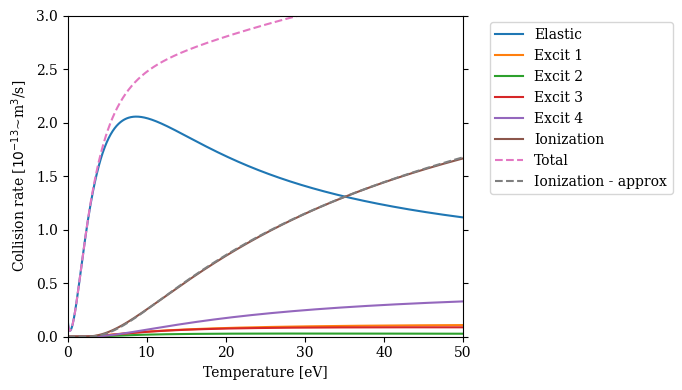

In [10]:
# energies = np.arange(0, 200, 0.0001)
distr0 = max_distrib(1, xarray)
distr1 = max_distrib(5, xarray)
distr2 = max_distrib(10, xarray)
distr3 = max_distrib(20, xarray)

print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr0[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr1[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr2[1:])))
print("{:.2e}".format(integrate_fct(xarray[1:], coll1_interp[1:], distr3[1:])))


Tvec = []
int_result1 = []
int_result2 = []
int_result3 = []
int_result4 = []
int_result5 = []
int_result6 = []

# for ind in range(50):
for ind in np.linspace(0.001,50, 1000):
    distr = max_distrib(ind, xarray)
    int_result1.append(integrate_fct(xarray[1:], coll1_interp[1:], distr[1:]))
    int_result2.append(integrate_fct(xarray[1:], coll2_interp[1:], distr[1:]))
    int_result3.append(integrate_fct(xarray[1:], coll3_interp[1:], distr[1:]))
    int_result4.append(integrate_fct(xarray[1:], coll4_interp[1:], distr[1:]))
    int_result5.append(integrate_fct(xarray[1:], coll5_interp[1:], distr[1:]))
    int_result6.append(integrate_fct(xarray[1:], ioniz_interp[1:], distr[1:]))
    Tvec.append(ind)

phi_iz = 14
Kiz = 1.6*10**-13*(1.5*np.array(Tvec)/phi_iz)**.25 * np.exp(-4/3*phi_iz/np.array(Tvec))

plt.figure(figsize=(7, 4))
plt.plot(Tvec, np.array(int_result1)*1e13, label = "Elastic")
plt.plot(Tvec, np.array(int_result2)*1e13, label = "Excit 1")
plt.plot(Tvec, np.array(int_result3)*1e13, label = "Excit 2")
plt.plot(Tvec, np.array(int_result4)*1e13, label = "Excit 3")
plt.plot(Tvec, np.array(int_result5)*1e13, label = "Excit 4")
plt.plot(Tvec, np.array(int_result6)*1e13, label = "Ionization")
plt.plot(Tvec, (np.array(int_result1) + np.array(int_result2) + np.array(int_result3) + np.array(int_result4) + np.array(int_result5) + np.array(int_result6))*1e13, ls="--", label = "Total")

plt.plot(Tvec, Kiz*1e13, ls="--", label = "Ionization - approx")


plt.xlabel("Temperature [eV]")
plt.ylabel("Collision rate [$10^{-13}$~m$^3$/s]")
plt.grid(False)
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# plt.savefig("images_compare_Kel/collision_rate.png", dpi=300, transparent=True)